# Detecção de musicas virais do Spotify baseado em características musicais

## Index

[1 Import Bibliotecas](#1-IMPORT-BIBLIOTECAS)  
[2 Leitura dos Dados](#2-LEITURA-DOS-DADOS)  
[3 Limpeza](#3-LIMPEZA)  
[4 Analise Exploratória dos dados (EDA)](#4-ANALISE-EXPLORATÓRIA-DOS-DADOS-(E.D.A))  
[5 Amostragem](#5-AMOSTRAGEM-ESTRATIFICADA)  
[6 Seleção de Features](#6-SELECAO-DE-FEATURES)  
[7 Prototipação](#7-PROTOTIPAÇÃO)  
[8 Modelagem: Machine Learning](#8-MODELAGEM:-MACHINE-LEARNING)  
[9 Validacao Estatística](#9-VALIDACAO-ESTATISTICA)  
  


## Esquema

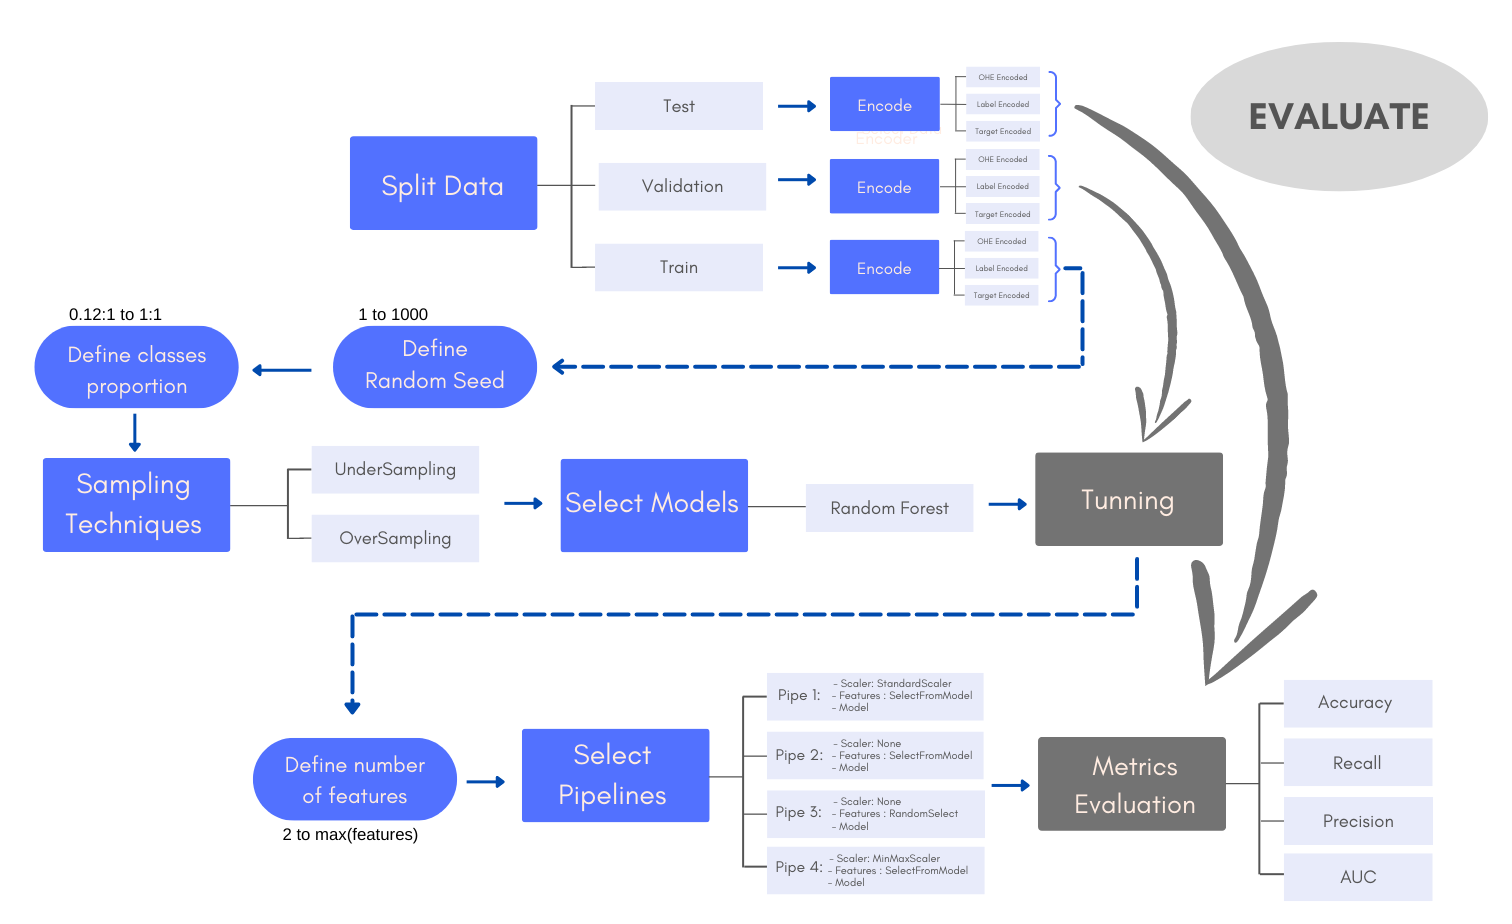

In [1]:
from IPython.display import Image
Image("Pipeline.png")

# 1 IMPORT BIBLIOTECAS

## 1.1 Import

In [2]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec


##########################
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport


#Visualização de dados
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

#Scalers e encoders
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder


#Balanceamento de dados
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Prototipação
from lazypredict.Supervised import LazyClassifier


from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import PredefinedSplit



#ML
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2 LEITURA DOS DADOS

## 2.1 Leitura

In [3]:
df_top_charts = pd.read_csv('streamings.csv')
df_top_charts.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,data
0,0,1,Recairei - Ao Vivo,Os Barões Da Pisadinha,1611265,https://open.spotify.com/track/2JTir3y1VuJQmex...,2021-01-01
1,1,2,Basta Você Me Ligar - Ao Vivo,Os Barões Da Pisadinha,1263779,https://open.spotify.com/track/3rRin3LyLY92kpE...,2021-01-01
2,2,3,Amor ou o Litrão,Petter Ferraz,1181284,https://open.spotify.com/track/7qmnP8Woc47dLSr...,2021-01-01
3,3,4,Meia Noite (Você tem meu Whatsapp),Tarcísio do Acordeon,1100935,https://open.spotify.com/track/6sPBi0qLI6KM3yX...,2021-01-01
4,4,5,Investe Em Mim,Jonas Esticado,1052844,https://open.spotify.com/track/15k1TDabqSEmyXO...,2021-01-01


In [4]:
df_features = pd.read_csv('audio_features2.csv')
df_features.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,uri,track_href,analysis_url,duration_ms,time_signature,URL,popularidade_cantor,seguidores_cantor,genero_cantor,genero_primario_cantor
0,0,0.58,0.94,10,-2.12,1,0.09,0.45,0.00,0.68,...,spotify:track:2JTir3y1VuJQmexiTCMcTP,https://api.spotify.com/v1/tracks/2JTir3y1VuJQ...,https://api.spotify.com/v1/audio-analysis/2JTi...,166838,4,https://open.spotify.com/track/2JTir3y1VuJQmex...,70,6220557,"arrocha, forro, piseiro",arrocha
1,1,0.60,0.91,5,-2.42,0,0.06,0.50,0.00,0.69,...,spotify:track:3rRin3LyLY92kpEbkCgwf4,https://api.spotify.com/v1/tracks/3rRin3LyLY92...,https://api.spotify.com/v1/audio-analysis/3rRi...,182977,4,https://open.spotify.com/track/3rRin3LyLY92kpE...,70,6220557,"arrocha, forro, piseiro",arrocha
2,2,0.93,0.71,9,-4.21,1,0.06,0.44,0.00,0.06,...,spotify:track:7qmnP8Woc47dLSrMD5MxL1,https://api.spotify.com/v1/tracks/7qmnP8Woc47d...,https://api.spotify.com/v1/audio-analysis/7qmn...,173913,4,https://open.spotify.com/track/7qmnP8Woc47dLSr...,41,17837,NaN,NaN
3,3,0.71,0.82,11,-4.79,0,0.03,0.69,0.00,0.15,...,spotify:track:6sPBi0qLI6KM3yXX56NxsA,https://api.spotify.com/v1/tracks/6sPBi0qLI6KM...,https://api.spotify.com/v1/audio-analysis/6sPB...,237900,4,https://open.spotify.com/track/6sPBi0qLI6KM3yX...,70,2665488,arrocha,arrocha
4,4,0.63,0.95,9,-1.28,1,0.03,0.32,0.00,0.12,...,spotify:track:15k1TDabqSEmyXOwMq9RM7,https://api.spotify.com/v1/tracks/15k1TDabqSEm...,https://api.spotify.com/v1/audio-analysis/15k1...,186533,4,https://open.spotify.com/track/15k1TDabqSEmyXO...,57,1629840,"arrocha, forro, sertanejo, sertanejo pop, sert...",arrocha


## 2.2 Consolidação Dataframe

In [5]:
def remover_html(string):

    padrao_achar = '/track/'
    
    indice_padrao = string.find(padrao_achar)
    
    indice_remocao = indice_padrao + len(padrao_achar)
    
    new_string = string[indice_remocao:]
    
    return new_string 

In [6]:
df_top_charts['URL_norm'] = df_top_charts['URL'].apply(lambda x: remover_html(x))
df_features['URL_norm'] = df_features['URL'].apply(lambda x: remover_html(x))

df_top_charts = df_top_charts.drop(["URL","Unnamed: 0"],axis=1)
df_features = df_features.drop(["URL","Unnamed: 0"],axis=1)

In [7]:
df = df_features.merge(df_top_charts, how='inner', on='URL_norm')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,popularidade_cantor,seguidores_cantor,genero_cantor,genero_primario_cantor,URL_norm,Position,Track Name,Artist,Streams,data
0,0.58,0.94,10,-2.12,1,0.09,0.45,0.00,0.68,0.94,...,70,6220557,"arrocha, forro, piseiro",arrocha,2JTir3y1VuJQmexiTCMcTP,1,Recairei - Ao Vivo,Os Barões Da Pisadinha,1611265,2021-01-01
1,0.58,0.94,10,-2.12,1,0.09,0.45,0.00,0.68,0.94,...,70,6220557,"arrocha, forro, piseiro",arrocha,2JTir3y1VuJQmexiTCMcTP,1,Recairei - Ao Vivo,Os Barões Da Pisadinha,873301,2021-01-02
2,0.58,0.94,10,-2.12,1,0.09,0.45,0.00,0.68,0.94,...,70,6220557,"arrocha, forro, piseiro",arrocha,2JTir3y1VuJQmexiTCMcTP,1,Recairei - Ao Vivo,Os Barões Da Pisadinha,806828,2021-01-03
3,0.58,0.94,10,-2.12,1,0.09,0.45,0.00,0.68,0.94,...,70,6220557,"arrocha, forro, piseiro",arrocha,2JTir3y1VuJQmexiTCMcTP,3,Recairei - Ao Vivo,Os Barões Da Pisadinha,551876,2021-01-04
4,0.58,0.94,10,-2.12,1,0.09,0.45,0.00,0.68,0.94,...,70,6220557,"arrocha, forro, piseiro",arrocha,2JTir3y1VuJQmexiTCMcTP,3,Recairei - Ao Vivo,Os Barões Da Pisadinha,544076,2021-01-05


## 2.3 Descrição das variáveis

**acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**duration_ms:** The duration of the track in milliseconds.

**energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**id:** The Spotify ID for the track.

**instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

>= -1
<= 11

**liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

>= 3
<= 7

**valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

>= 0
<= 1

## 2.4 Visualização resumida do dataset

In [8]:
print("Numero de linhas = {}".format(df.shape[0]))
print("Numero de colunas = {}".format(df.shape[1]))

Numero de linhas = 96999
Numero de colunas = 28


In [9]:
print("Numero de linhas = {}".format(df.shape[0]))
print("Numero de colunas = {}".format(df.shape[1]))

Numero de linhas = 96999
Numero de colunas = 28


In [10]:
#import pandas_profiling
#pandas_profiling.ProfileReport(df)

## 2.5 Visualização tipo dos dados

In [11]:
df.dtypes

danceability              float64
energy                    float64
key                         int64
loudness                  float64
mode                        int64
speechiness               float64
acousticness              float64
instrumentalness          float64
liveness                  float64
valence                   float64
tempo                     float64
type                       object
id                         object
uri                        object
track_href                 object
analysis_url               object
duration_ms                 int64
time_signature              int64
popularidade_cantor         int64
seguidores_cantor           int64
genero_cantor              object
genero_primario_cantor     object
URL_norm                   object
Position                    int64
Track Name                 object
Artist                     object
Streams                     int64
data                       object
dtype: object

## 2.6 Visualização de valores únicos por coluna

In [12]:
for feature in df.columns:
    print("-----------------------------------------------------------------------------------")
    print("Quantidade de registros unicos para a variável = {} - {}".format(feature,len(df[feature].unique())))
    
    ## Printa os valores unicos caso a variávei possua menos de 3 valores unicos
    if (len(df[feature].unique()))<=12:
        
        for valor_unico in df[feature].unique():
            print("Valor único: {}".format(valor_unico))

-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = danceability - 538
-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = energy - 610
-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = key - 12
Valor único: 10
Valor único: 5
Valor único: 9
Valor único: 11
Valor único: 6
Valor único: 3
Valor único: 1
Valor único: 7
Valor único: 4
Valor único: 0
Valor único: 2
Valor único: 8
-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = loudness - 1411
-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = mode - 2
Valor único: 1
Valor único: 0
---------------------------------------------------------

In [13]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'popularidade_cantor', 'seguidores_cantor',
       'genero_cantor', 'genero_primario_cantor', 'URL_norm', 'Position',
       'Track Name', 'Artist', 'Streams', 'data'],
      dtype='object')

## 2.6 Separação target, features categóricas e features contínuas / discretas.

In [14]:
features_categoricas = ['key', 'mode', 'type', 'time_signature']
features_continuas = ['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'popularidade_cantor', 'seguidores_cantor',
       'genero_cantor', 'genero_primario_cantor', 'URL_norm', 'Position',
       'Track Name', 'Artist', 'Streams', 'data']

var_target = 'A definir'

# 3 LIMPEZA

## 3.1 Valores faltantes

In [15]:
df.isnull().sum()

danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
type                         0
id                           0
uri                          0
track_href                   0
analysis_url                 0
duration_ms                  0
time_signature               0
popularidade_cantor          0
seguidores_cantor            0
genero_cantor             3840
genero_primario_cantor    3840
URL_norm                     0
Position                     0
Track Name                  22
Artist                      22
Streams                      0
data                         0
dtype: int64

In [16]:
#df.dropna(inplace=True)

- Há valores nulos para o genero do cantor assim como o nome do cantor e o nome da música, no entanto, essas colunas não serão relevantes para construção do modelo de Machine Learning, portanto iremos manter os registros

## 3.2 Registros duplicados

In [17]:
## Checando pela chave primária
df.duplicated().sum()

0

- Não há valores duplicados na base

## 3.3 Exclusão colunas

- A coluna type possui apenas um único valor, vamos excluí-la

In [18]:
df = df.drop(columns=["type"])
features_categoricas = ['key', 'mode', 'time_signature']

## 3.4 Outliers

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,96999.00,0.68,0.13,0.16,0.59,0.68,0.77,0.98
energy,96999.00,0.71,0.16,0.02,0.60,0.73,0.83,0.99
key,96999.00,5.34,3.57,0.00,2.00,6.00,8.00,11.00
loudness,96999.00,-5.07,2.17,-28.32,-6.27,-4.72,-3.72,1.91
mode,96999.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
speechiness,96999.00,0.10,0.10,0.02,0.04,0.06,0.11,0.88
acousticness,96999.00,0.35,0.22,0.00,0.16,0.33,0.53,0.97
instrumentalness,96999.00,0.00,0.02,0.00,0.00,0.00,0.00,0.97
liveness,96999.00,0.25,0.24,0.01,0.09,0.14,0.33,0.99
valence,96999.00,0.66,0.21,0.03,0.52,0.69,0.83,0.97


- Não há outliers aparentes na base de dados

# 4 Feature Engineering: Transformações

## 4.1 Definição de funções

In [20]:
### Função retorna o maior número de streams ocorridas em uma música no dia
def encontra_maximo_stream_dia(dia_string, df):
    maximo_dia = df[df['data']==dia_string].Streams.max()
    
    return maximo_dia

In [21]:
## Função retorna a data da primeira ocorrência da música no top 200
def encontra_primeira_data_ocorrencia(url_string, df):
    primeira_data = df[df['URL_norm']==url_string].data.min()
    
    return primeira_data

In [22]:
df[df['URL_norm']=='2JTir3y1VuJQmexiTCMcTP'].data.min()

'2021-01-01'

## 4.2 Número de streams máxima diária

In [23]:
df['maxima_dia'] = df['data'].apply(lambda x: encontra_maximo_stream_dia(x, df))

KeyboardInterrupt: 

## 4.3 Popularidade normalizada diária

In [ ]:
df['popularidade_diaria_norm'] = df['Streams']/df['maxima_dia']

## 4.4 Data entrada nos charts

In [ ]:
df['data_primeira_ocorrencia'] = df['URL_norm'].apply(lambda x: encontra_primeira_data_ocorrencia(x, df))

In [ ]:
#df.to_csv('dados_semi_processados')
df = pd.read_csv('dados_semi_processados')

## 4.5 Dias corridos desde primeira entrada nos charts

In [26]:
df['data'] = df['data'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
df['data_primeira_ocorrencia'] = df['data_primeira_ocorrencia'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

In [27]:
df['dias_no_charts'] = (df['data'] - df['data_primeira_ocorrencia']).dt.days + 1

In [28]:
df[df['dias_no_charts']<=120]

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,URL_norm,Position,Track Name,Artist,Streams,data,maxima_dia,popularidade_diaria_norm,data_primeira_ocorrencia,dias_no_charts
0,0,0.58,0.94,10,-2.12,1,0.09,0.45,0.00,0.68,...,2JTir3y1VuJQmexiTCMcTP,1,Recairei - Ao Vivo,Os Barões Da Pisadinha,1611265,2021-01-01,1611265,1.00,2021-01-01,1
1,1,0.58,0.94,10,-2.12,1,0.09,0.45,0.00,0.68,...,2JTir3y1VuJQmexiTCMcTP,1,Recairei - Ao Vivo,Os Barões Da Pisadinha,873301,2021-01-02,873301,1.00,2021-01-01,2
2,2,0.58,0.94,10,-2.12,1,0.09,0.45,0.00,0.68,...,2JTir3y1VuJQmexiTCMcTP,1,Recairei - Ao Vivo,Os Barões Da Pisadinha,806828,2021-01-03,806828,1.00,2021-01-01,3
3,3,0.58,0.94,10,-2.12,1,0.09,0.45,0.00,0.68,...,2JTir3y1VuJQmexiTCMcTP,3,Recairei - Ao Vivo,Os Barões Da Pisadinha,551876,2021-01-04,717103,0.77,2021-01-01,4
4,4,0.58,0.94,10,-2.12,1,0.09,0.45,0.00,0.68,...,2JTir3y1VuJQmexiTCMcTP,3,Recairei - Ao Vivo,Os Barões Da Pisadinha,544076,2021-01-05,715246,0.76,2021-01-01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96994,96994,0.87,0.84,10,-1.93,1,0.09,0.53,0.00,0.04,...,1OosuFhKograArfZ6JXedk,138,Me Chama de Amor (feat. Treyce) - Arrochadeira...,O Tubarão,148648,2022-04-30,1081799,0.14,2022-04-29,2
96995,96995,0.49,0.93,7,-1.82,1,0.07,0.28,0.00,0.25,...,1Unc6luL5ueLO3t8I5YtpP,191,Rave e Bagaceira,Anderson & Vei da Pisadinha,116331,2022-04-29,919738,0.13,2022-04-29,1
96996,96996,0.49,0.93,7,-1.82,1,0.07,0.28,0.00,0.25,...,1Unc6luL5ueLO3t8I5YtpP,141,Rave e Bagaceira,Anderson & Vei da Pisadinha,144307,2022-04-30,1081799,0.13,2022-04-29,2
96997,96997,0.56,0.89,5,-2.95,0,0.09,0.47,0.00,0.89,...,0FV4eVWzSAglihmcJPECiE,148,Homem É Tudo Igual - Ao Vivo,Simone & Simaria,140786,2022-04-30,1081799,0.13,2022-04-30,1


## 4.6 Popularidade 120 dias de charts desde a primeira entrada

In [83]:
df_popularidade = df[df['dias_no_charts']<=120].groupby(['URL_norm']).agg({'popularidade_diaria_norm':['nunique','mean','std'], 'data_primeira_ocorrencia': [min]})
df_popularidade = df_popularidade.reset_index()
df_popularidade.columns = df_popularidade.columns.droplevel()
df_popularidade

df_popularidade = df_popularidade.rename({'nunique': 'n_registros_120', 
                                                  'mean': 'media_popnorm_120',
                                                 'std': 'std_popnorm_120',
                                          'min': 'data_entrada_charts',
                                                 '': 'URL_norm'}, axis='columns')
df_popularidade

,URL_norm,n_registros_120,media_popnorm_120,std_popnorm_120,data_entrada_charts
0,000RW47rhEkSqjgTrZx7YX,120,0.23,0.11,2021-04-23
1,006pMMCuRo2TFjh8sNGSov,1,0.10,nan,2021-05-05
2,00Blm7zeNqgYLPtW6zg8cj,7,0.11,0.01,2021-11-05
3,00I29V4jIc7hAifIn1mtnb,2,0.09,0.00,2021-02-07
4,00Ofee5Bbfstz49RfSL0oM,2,0.13,0.07,2022-02-11
...,...,...,...,...,...
1713,7ytR5pFWmSjzHJIeQkgog4,16,0.13,0.01,2021-01-04
1714,7zFuITiPIDicaG70XIn0hm,13,0.10,0.01,2021-03-05
1715,7zQirOExB0VR8yWUOqYeio,4,0.14,0.05,2021-09-17
1716,7zcQ56JRoNd4JAwGKcrxiZ,11,0.09,0.01,2022-02-22


In [84]:
df_popularidade.isna().sum()

URL_norm                 0
n_registros_120          0
media_popnorm_120        0
std_popnorm_120        312
data_entrada_charts      0
dtype: int64

In [85]:
df_popularidade[df_popularidade.n_registros_120.isna()].n_registros_120.value_counts()

Series([], Name: n_registros_120, dtype: int64)

- Há 1718 registros de músicas únicas que ficaram ao menos 1 dia nas charts entre 2021 e 2022
- Todos registros onde nao foi possível calcular std é por que havia apenas 1 registro nas charts em 120 dias desde a entrada da música nas charts!
- Para esses registros iremos penalizar a media considerando que houveram 0 streams em dias que não performaram no top 200 das charts

### Penalização popularidade para dias sem ocorrência no top 200

In [86]:
n_reg_alvo = 120
df_popularidade['media_pop_corrigida_120'] = df_popularidade['media_popnorm_120'] * df_popularidade['n_registros_120'] / n_reg_alvo
df_popularidade.sample(5)

,URL_norm,n_registros_120,media_popnorm_120,std_popnorm_120,data_entrada_charts,media_pop_corrigida_120
252,13yJDBUcxCD3xa6zBZhwzX,20,0.10,0.02,2021-03-07,0.02
434,1v1oIWf2Xgh54kIWuKsDf6,65,0.12,0.03,2021-04-12,0.07
541,2LUj933qs4IEFzSLLS9aJS,1,0.10,nan,2022-03-14,0.00
582,2VATVdFqb7QqxfAcQPvNpc,30,0.19,0.04,2022-04-01,0.05
1402,6T6D9CIrHkALcHPafDFA6L,1,0.19,nan,2021-01-15,0.00


In [87]:
### Filtro de músicas que deram entrada em 2021 APENAS

In [88]:
from dateutil import parser
df_popularidade['data_entrada_charts'] = pd.to_datetime(df_popularidade['data_entrada_charts'])
df_popularidade = df_popularidade[df_popularidade['data_entrada_charts']<= parser.parse('2021-12-31')]
df_popularidade

,URL_norm,n_registros_120,media_popnorm_120,std_popnorm_120,data_entrada_charts,media_pop_corrigida_120
0,000RW47rhEkSqjgTrZx7YX,120,0.23,0.11,2021-04-23,0.23
1,006pMMCuRo2TFjh8sNGSov,1,0.10,nan,2021-05-05,0.00
2,00Blm7zeNqgYLPtW6zg8cj,7,0.11,0.01,2021-11-05,0.01
3,00I29V4jIc7hAifIn1mtnb,2,0.09,0.00,2021-02-07,0.00
5,017PF4Q3l4DBUiWoXk4OWT,50,0.12,0.02,2021-01-04,0.05
...,...,...,...,...,...,...
1712,7ysjfyBKvnO2iX1vWqhn4X,2,0.17,0.06,2021-11-30,0.00
1713,7ytR5pFWmSjzHJIeQkgog4,16,0.13,0.01,2021-01-04,0.02
1714,7zFuITiPIDicaG70XIn0hm,13,0.10,0.01,2021-03-05,0.01
1715,7zQirOExB0VR8yWUOqYeio,4,0.14,0.05,2021-09-17,0.00


- Há 1318 musicas que deram entrada nos charts em 2021

## 4.8 Popularidade 30,60,90,120 dias de charts desde a primeira entrada

In [89]:
def gerar_df_popularidade_med_corrigida(num_dias,df):
    
    df_popularidade = df[df['dias_no_charts']<=num_dias].groupby(['URL_norm']).agg({'popularidade_diaria_norm':['nunique','mean'], 'data_primeira_ocorrencia': [min]})
    df_popularidade = df_popularidade.reset_index()
    df_popularidade.columns = df_popularidade.columns.droplevel()
    df_popularidade

    nome_coluna1 = 'URL_norm'
    nome_coluna2 = 'n_registros_' + str(num_dias)
    nome_coluna3 = 'media_popnorm_' + str(num_dias)
    nome_coluna4 = 'media_pop_corrigida_' + str(num_dias)
    nome_coluna5 = 'data_entrada_charts'
    
    df_popularidade = df_popularidade.rename({'': nome_coluna1,
                                              'nunique': nome_coluna2,
                                              'mean': nome_coluna3,
                                             'min': nome_coluna5}, axis='columns')




    ##corrige média
    df_popularidade[nome_coluna4] = df_popularidade[nome_coluna3] * df_popularidade[nome_coluna2] / num_dias
    
    ## Filtra apenas músicas que deram entrada em 2021
    df_popularidade['data_entrada_charts'] = pd.to_datetime(df_popularidade['data_entrada_charts'])
    df_popularidade = df_popularidade[df_popularidade['data_entrada_charts']<= parser.parse('2021-12-31')]
    
    ## filtra apenas as colunas uteis com a pop corrigida e url
    df_popularidade = df_popularidade[[nome_coluna1,nome_coluna4]]
    

    return df_popularidade

In [90]:
df_30 = gerar_df_popularidade_med_corrigida(30,df)
df_60 = gerar_df_popularidade_med_corrigida(60,df)
df_90 = gerar_df_popularidade_med_corrigida(90,df)
df_120 = gerar_df_popularidade_med_corrigida(120,df)

## 4.9 Consolidação dataframe

In [92]:
df = df_features.merge(df_30, how='inner', on='URL_norm')
df = df.merge(df_60, how='inner', on='URL_norm')
df = df.merge(df_90, how='inner', on='URL_norm')
df = df.merge(df_120, how='inner', on='URL_norm')
df.sample(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,popularidade_cantor,seguidores_cantor,genero_cantor,genero_primario_cantor,URL_norm,media_pop_corrigida_30,media_pop_corrigida_60,media_pop_corrigida_90,media_pop_corrigida_120
245,0.96,0.49,2,-8.89,1,0.19,0.02,0.04,0.07,0.32,...,4,79,6790815,"dance pop, pop, pop rap",dance pop,2vBET2pmrQqafaS6zIaYta,0.09,0.11,0.11,0.11
1183,0.68,0.66,9,-5.68,0,0.07,0.57,0.00,0.15,0.60,...,4,81,25185253,"arrocha, sertanejo",arrocha,1G0kLIS0hE6uUPlIE9gksp,0.29,0.23,0.19,0.15
136,0.84,0.78,1,-2.89,1,0.05,0.27,0.00,0.79,0.66,...,4,70,2438313,"arrocha, forro de favela, funk carioca",arrocha,7eFezDGsbmX3bawb3rmtAr,0.01,0.01,0.00,0.00
68,0.61,0.87,9,-3.94,1,0.18,0.47,0.00,0.83,0.72,...,4,61,2570627,"arrocha, sertanejo, sertanejo pop, sertanejo u...",arrocha,1WTJdd2atKxhUrbvUHjNDt,0.20,0.17,0.13,0.10
1356,0.63,0.74,3,-5.32,0,0.30,0.39,0.00,0.09,0.77,...,3,72,1234285,"funk carioca, funk consciente, trap funk",funk carioca,1iaPDgTbsKrlznVu13EWIf,0.10,0.13,0.14,0.14
125,0.67,0.74,4,-4.43,1,0.06,0.06,0.00,0.96,0.66,...,4,81,25185253,"arrocha, sertanejo",arrocha,3GmJxfnUDrIs1iCfKUELFz,0.12,0.07,0.04,0.03
1008,0.69,0.72,0,-6.46,0,0.04,0.10,0.00,0.27,0.55,...,4,82,11385121,"lgbtq+ hip hop, pop",lgbtq+ hip hop,3grVoZ10bm2jUGpo7BxpuF,0.02,0.01,0.01,0.00
523,0.58,0.92,6,-3.61,1,0.05,0.29,0.00,0.07,0.84,...,4,65,761520,"arrocha, arrochadeira, funk carioca, funk paul...",arrocha,4wQUopWk9Ed7Ng5qpKN5qd,0.55,0.70,0.74,0.63
156,0.64,0.87,3,-3.16,1,0.13,0.44,0.00,0.08,0.83,...,4,69,2078575,"arrocha, sertanejo, sertanejo pop, sertanejo u...",arrocha,36P6ptTyxOggYgR2aoZiAl,0.01,0.01,0.00,0.00
1379,0.94,0.75,2,-2.80,1,0.10,0.15,0.00,0.07,0.96,...,4,49,91351,"arrocha, arrochadeira",arrocha,7uHVSsfgVm7FpG7bTDPtSo,0.03,0.06,0.05,0.04


## 4.10 Definição variávei target: 90% / 80% Percentil da popularidade

In [93]:
percentil_90_120 = df.quantile(0.90, numeric_only=True).media_pop_corrigida_120
percentil_80_120 = df.quantile(0.80, numeric_only=True).media_pop_corrigida_120

percentil_90_90 = df.quantile(0.90, numeric_only=True).media_pop_corrigida_90
percentil_80_90 = df.quantile(0.80, numeric_only=True).media_pop_corrigida_90

percentil_90_60 = df.quantile(0.90, numeric_only=True).media_pop_corrigida_60
percentil_80_60 = df.quantile(0.80, numeric_only=True).media_pop_corrigida_60

percentil_90_30 = df.quantile(0.90, numeric_only=True).media_pop_corrigida_30
percentil_80_30 = df.quantile(0.80, numeric_only=True).media_pop_corrigida_30

In [94]:
df['target_80_120'] = df['media_pop_corrigida_120'].apply(lambda x: 1 if x > percentil_80_120 else 0 )
df['target_90_120'] = df['media_pop_corrigida_120'].apply(lambda x: 1 if x > percentil_90_120 else 0 )

df['target_80_90'] = df['media_pop_corrigida_90'].apply(lambda x: 1 if x > percentil_80_90 else 0 )
df['target_90_90'] = df['media_pop_corrigida_90'].apply(lambda x: 1 if x > percentil_90_90 else 0 )

df['target_80_60'] = df['media_pop_corrigida_60'].apply(lambda x: 1 if x > percentil_80_60 else 0 )
df['target_90_60'] = df['media_pop_corrigida_60'].apply(lambda x: 1 if x > percentil_90_60 else 0 )

df['target_80_30'] = df['media_pop_corrigida_30'].apply(lambda x: 1 if x > percentil_80_30 else 0 )
df['target_90_30'] = df['media_pop_corrigida_30'].apply(lambda x: 1 if x > percentil_90_30 else 0 )

df.sample(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,media_pop_corrigida_90,media_pop_corrigida_120,target_80_120,target_90_120,target_80_90,target_90_90,target_80_60,target_90_60,target_80_30,target_90_30
725,0.72,0.82,7,-8.21,0,0.06,0.19,0.00,0.07,0.93,...,0.41,0.39,1,1,1,1,1,1,1,1
635,0.65,0.68,8,-6.67,1,0.16,0.27,0.00,0.20,0.38,...,0.01,0.01,0,0,0,0,0,0,0,0
1338,0.64,0.54,6,-6.63,0,0.19,0.13,0.00,0.10,0.42,...,0.14,0.14,0,0,0,0,0,0,0,0
40,0.63,0.82,1,-3.09,1,0.10,0.38,0.00,0.25,0.45,...,0.12,0.09,0,0,0,0,0,0,1,1
64,0.38,0.61,0,-4.45,1,0.03,0.23,0.00,0.12,0.70,...,0.17,0.15,1,0,1,0,1,0,1,0
1078,0.62,0.56,6,-1.83,0,0.08,0.77,0.01,0.10,0.72,...,0.12,0.09,0,0,0,0,0,0,0,0
402,0.63,0.78,10,-6.66,1,0.19,0.49,0.00,0.11,0.70,...,0.14,0.11,0,0,0,0,1,0,1,1
929,0.63,0.86,10,-5.06,0,0.18,0.33,0.00,0.46,0.92,...,0.01,0.01,0,0,0,0,0,0,0,0
1225,0.74,0.75,2,-4.98,1,0.03,0.28,0.00,0.16,0.63,...,0.00,0.00,0,0,0,0,0,0,0,0
244,0.61,0.81,10,-2.81,1,0.03,0.05,0.02,0.10,0.40,...,0.06,0.04,0,0,0,0,0,0,0,0


## 4.11 Análise de frequencia de palavras nos generos

In [95]:
def tokeniza_e_cria_df_tokens(df,nome_coluna_df):
    
    ##cria novo df com token unico
    df_tokens_unicos = pd.DataFrame(columns=['token_unico'])
    
    ##Percore df
    for num_iteracao, str_nao_tokenizado in enumerate(df[nome_coluna_df]):
        
            
        lista_tokens1 = str_nao_tokenizado.split(',')

        for tk1 in lista_tokens1:
            
            ## remoke os espaços antes e depois
            tk1 = tk1.strip()

                                
            ## Checa a unicidade
            regs_iguais = len(df_tokens_unicos[df_tokens_unicos['token_unico']==tk1])

            if regs_iguais == 0:
                 df_tokens_unicos = df_tokens_unicos.append({'token_unico': tk1}, ignore_index=True)
                                
    

    return df_tokens_unicos

In [96]:
df_analise = df.copy()
df_analise.dropna(inplace=True)

tokens_unicos_estilos = tokeniza_e_cria_df_tokens(df_analise, 'genero_cantor')
tokens_unicos_estilos

,token_unico
0,arrocha
1,forro
2,piseiro
3,sertanejo
4,sertanejo pop
...,...
173,synthpop
174,pop nacional antigas
175,adult standards
176,jazz pop


In [97]:
def contador_frequencias(df_tokens, df):
    
    ## Cria dataframe de frequencias
    df_frequencias = pd.DataFrame(columns=['token_unico','freq'])

    ## Percorre cada token
    for row_token in df_tokens.iterrows():

        ## Zera o contador para cada token
        contador_freq = 0
        genero_tokenizado = row_token[1]['token_unico']




        ## Percorre cada registro na tabela fato
        for row in df.iterrows():
            genero_df = row[1]['genero_cantor']
            
            ## Checa se o token ocorre no registro da tabela fato e soma o contador
            if genero_tokenizado in genero_df:
                contador_freq = contador_freq + 1

        df_frequencias = df_frequencias.append({'token_unico': genero_tokenizado, 'freq':contador_freq}, ignore_index=True)
    
    return df_frequencias

In [98]:
df_freq = contador_frequencias(tokens_unicos_estilos, df_analise)
df_freq.sort_values(by = 'freq', ascending = False)

,token_unico,freq
26,pop,637
0,arrocha,501
3,sertanejo,402
6,funk carioca,264
4,sertanejo pop,230
...,...,...
113,rap geek,1
110,umbanda,1
107,dutch pop,1
104,groove gospel,1


## 4.12 Genero do cantor mais provável de acordo com a tabela de frequência

In [99]:
def cria_genero_primario(genero, df_freq):
    
    for row in df_freq.iterrows():
        genero_unico = row[1]['token_unico']

        if genero_unico in genero:
            return genero_unico

In [100]:
df_analise['genero_primario_provavel'] = df_analise['genero_cantor'].apply(lambda x: cria_genero_primario(x, df_freq))
df_analise.sample(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,media_pop_corrigida_120,target_80_120,target_90_120,target_80_90,target_90_90,target_80_60,target_90_60,target_80_30,target_90_30,genero_primario_provavel
280,0.90,0.47,9,-10.86,1,0.42,0.32,0.00,0.07,0.93,...,0.07,0,0,0,0,0,0,0,0,funk carioca
668,0.69,0.57,10,-6.33,0,0.12,0.20,0.00,0.06,0.70,...,0.10,0,0,0,0,0,0,0,0,pop
528,0.53,0.68,9,-4.56,1,0.42,0.47,0.00,0.32,0.64,...,0.01,0,0,0,0,0,0,0,0,arrocha
1136,0.46,0.83,8,-3.65,0,0.28,0.53,0.00,0.97,0.62,...,0.60,1,1,1,1,1,1,1,0,arrocha
607,0.44,0.53,1,-7.96,1,0.19,0.18,0.00,0.11,0.47,...,0.00,0,0,0,0,0,0,0,0,funk carioca
685,0.85,0.46,3,-7.45,1,0.04,0.22,0.00,0.35,0.87,...,0.03,0,0,0,0,0,0,0,0,pop
980,0.69,0.39,7,-8.35,0,0.30,0.61,0.00,0.13,0.15,...,0.00,0,0,0,0,0,0,0,0,canadian pop
394,0.65,0.52,11,-9.02,0,0.05,0.11,0.00,0.20,0.55,...,0.14,1,0,1,0,0,0,0,0,pop
1113,0.70,0.82,8,-3.04,1,0.04,0.15,0.00,0.13,0.96,...,0.11,0,0,0,0,0,0,0,0,forro
929,0.63,0.86,10,-5.06,0,0.18,0.33,0.00,0.46,0.92,...,0.01,0,0,0,0,0,0,0,0,arrocha


## 4.13 Consolidação do dataframe

In [102]:
df_generos = df_analise[['URL_norm', 'genero_primario_provavel']]
df_generos.head()

,URL_norm,genero_primario_provavel
0,2JTir3y1VuJQmexiTCMcTP,arrocha
1,3rRin3LyLY92kpEbkCgwf4,arrocha
3,6sPBi0qLI6KM3yXX56NxsA,arrocha
4,15k1TDabqSEmyXOwMq9RM7,arrocha
5,3dPvQLKl42dMYWV4LWRTLK,arrocha


In [103]:
df = df.merge(df_generos, how='left', on='URL_norm')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,media_pop_corrigida_120,target_80_120,target_90_120,target_80_90,target_90_90,target_80_60,target_90_60,target_80_30,target_90_30,genero_primario_provavel
0,0.58,0.94,10,-2.12,1,0.09,0.45,0.00,0.68,0.94,...,0.50,1,1,1,1,1,1,1,1,arrocha
1,0.60,0.91,5,-2.42,0,0.06,0.50,0.00,0.69,0.83,...,0.47,1,1,1,1,1,1,1,1,arrocha
2,0.93,0.71,9,-4.21,1,0.06,0.44,0.00,0.06,0.96,...,0.37,1,1,1,1,1,1,1,1,NaN
3,0.71,0.82,11,-4.79,0,0.03,0.69,0.00,0.15,0.92,...,0.58,1,1,1,1,1,1,1,1,arrocha
4,0.63,0.95,9,-1.28,1,0.03,0.32,0.00,0.12,0.80,...,0.39,1,1,1,1,1,1,1,1,arrocha


## 4.14 Preenchimento Genero do cantor para "Nenhum" quando não há

In [104]:
df.isna().sum()

danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
type                         0
id                           0
uri                          0
track_href                   0
analysis_url                 0
duration_ms                  0
time_signature               0
popularidade_cantor          0
seguidores_cantor            0
genero_cantor               49
genero_primario_cantor      49
URL_norm                     0
media_pop_corrigida_30       0
media_pop_corrigida_60       0
media_pop_corrigida_90       0
media_pop_corrigida_120      0
target_80_120                0
target_90_120                0
target_80_90                 0
target_90_90                 0
target_80_60                 0
target_9

In [105]:
df['genero_cantor'].fillna(value='Nenhum', inplace=True)
df['genero_primario_cantor'].fillna(value='Nenhum', inplace=True)
df['genero_primario_provavel'].fillna(value='Nenhum', inplace=True)
df.isna().sum()

danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
type                        0
id                          0
uri                         0
track_href                  0
analysis_url                0
duration_ms                 0
time_signature              0
popularidade_cantor         0
seguidores_cantor           0
genero_cantor               0
genero_primario_cantor      0
URL_norm                    0
media_pop_corrigida_30      0
media_pop_corrigida_60      0
media_pop_corrigida_90      0
media_pop_corrigida_120     0
target_80_120               0
target_90_120               0
target_80_90                0
target_90_90                0
target_80_60                0
target_90_60                0
target_80_

In [107]:
#df.to_csv('dados_processados.csv')

## 4.15 Redefinição das variáveis e da target

In [24]:
df = pd.read_csv('dados_processados.csv')
df.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'popularidade_cantor',
       'seguidores_cantor', 'genero_cantor', 'genero_primario_cantor',
       'URL_norm', 'media_pop_corrigida_30', 'media_pop_corrigida_60',
       'media_pop_corrigida_90', 'media_pop_corrigida_120', 'target_80_120',
       'target_90_120', 'target_80_90', 'target_90_90', 'target_80_60',
       'target_90_60', 'target_80_30', 'target_90_30',
       'genero_primario_provavel'],
      dtype='object')

In [25]:
features_categoricas = ['key', 'mode', 'time_signature', 'genero_primario_provavel']
features_continuas = ['danceability', 'energy', 'loudness', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',  'duration_ms', 'popularidade_cantor', 'seguidores_cantor', 'media_pop_corrigida_60']
var_target = ['target_80_120', 'target_90_120', 'target_80_90', 'target_90_90', 'target_80_60',
       'target_90_60', 'target_80_30', 'target_90_30']

df = df [features_categoricas + features_continuas + var_target]
df.head()

,key,mode,time_signature,genero_primario_provavel,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,seguidores_cantor,media_pop_corrigida_60,target_80_120,target_90_120,target_80_90,target_90_90,target_80_60,target_90_60,target_80_30,target_90_30
0,10,1,4,arrocha,0.58,0.94,-2.12,0.09,0.45,0.00,...,6220557,0.70,1,1,1,1,1,1,1,1
1,5,0,4,arrocha,0.60,0.91,-2.42,0.06,0.50,0.00,...,6220557,0.61,1,1,1,1,1,1,1,1
2,9,1,4,Nenhum,0.93,0.71,-4.21,0.06,0.44,0.00,...,17837,0.57,1,1,1,1,1,1,1,1
3,11,0,4,arrocha,0.71,0.82,-4.79,0.03,0.69,0.00,...,2665488,0.72,1,1,1,1,1,1,1,1
4,9,1,4,arrocha,0.63,0.95,-1.28,0.03,0.32,0.00,...,1629840,0.54,1,1,1,1,1,1,1,1


In [29]:
#df[df['target_90_60']==1].genero_primario_provavel.tolist()

# 5 ANALISE EXPLORATÓRIA DOS DADOS (E.D.A)

In [40]:
## Análise realizada para target percentil 90% em popularidade calculada para 60 dias
var_target = 'target_90_60'

## 5.1 Estatística Descritiva

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
key,1381.0,5.360608e+00,3.548874e+00,0.000000,2.00000,6.000000e+00,8.000000e+00,1.100000e+01
mode,1381.0,5.582911e-01,4.967704e-01,0.000000,0.00000,1.000000e+00,1.000000e+00,1.000000e+00
time_signature,1381.0,3.986966e+00,2.820286e-01,1.000000,4.00000,4.000000e+00,4.000000e+00,5.000000e+00
danceability,1381.0,6.705337e-01,1.346038e-01,0.161000,0.59400,6.720000e-01,7.620000e-01,9.640000e-01
energy,1381.0,6.791653e-01,1.720058e-01,0.022900,0.56400,7.000000e-01,8.150000e-01,9.860000e-01
loudness,1381.0,-5.619235e+00,2.657069e+00,-28.325000,-6.99900,-5.260000e+00,-3.846000e+00,1.906000e+00
speechiness,1381.0,1.062250e-01,1.055235e-01,0.024800,0.04310,6.270000e-02,1.220000e-01,8.790000e-01
acousticness,1381.0,3.445913e-01,2.355990e-01,0.000110,0.15200,3.170000e-01,5.240000e-01,9.740000e-01
instrumentalness,1381.0,9.504962e-03,7.181141e-02,0.000000,0.00000,0.000000e+00,5.560000e-06,9.710000e-01
liveness,1381.0,2.401547e-01,2.321304e-01,0.013400,0.09590,1.320000e-01,3.130000e-01,9.890000e-01


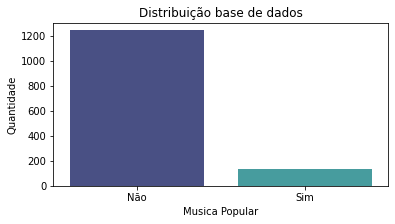

In [42]:
plt.figure(figsize=(6,3))
ax = sns.countplot(df[var_target], data = df,
palette='mako')
ax.set(ylabel='Quantidade', xlabel='Musica Popular', title='Distribuição base de dados',  xticklabels = ['Não','Sim'])

plt.xticks()
plt.show()

- Há 10% de musicas populares na base de dados

## 5.2 Distribuição variáveis contínuas

In [43]:
df_continua = df[ features_continuas + [var_target] ]

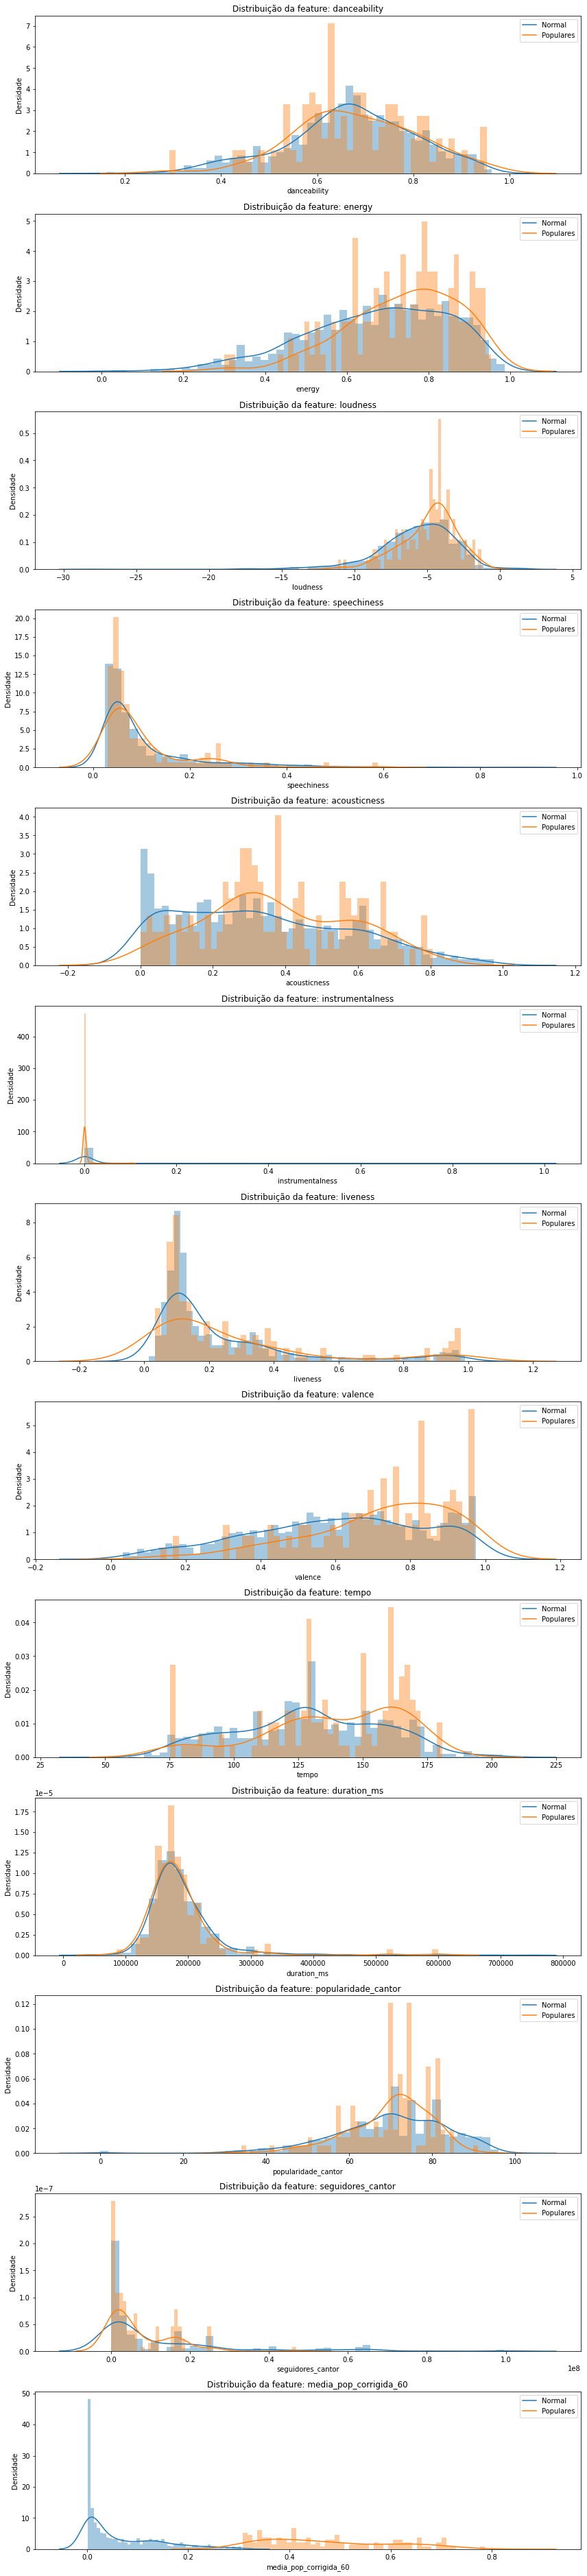

In [44]:
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")

features = features_continuas

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)

for i, cn in enumerate(df_continua[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df_continua[cn][df_continua[var_target] == 0], bins=50)
    sns.distplot(df_continua[cn][df_continua[var_target] == 1], bins=50)
    
    ## Eixos
    ax.set_xlabel(cn)
    ax.set_ylabel('Densidade')
    
    ## Titulo
    ax.set_title('Distribuição da feature: ' + str(cn))
    
    ## Legenda
    plt.legend(labels=["Normal","Populares"])
    
    ## Melhorar visualização
    plt.tight_layout()
    
plt.show()

Insights:



## 5.3 Distribuição variáveis categóricas

In [45]:
df_categorica = df[features_categoricas + [var_target]]

key


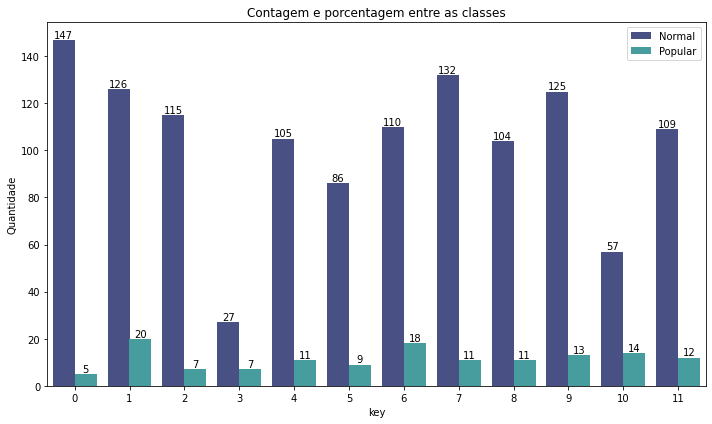

mode


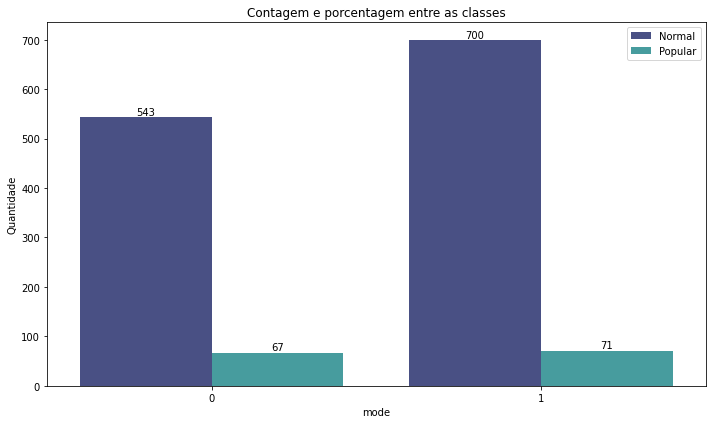

time_signature


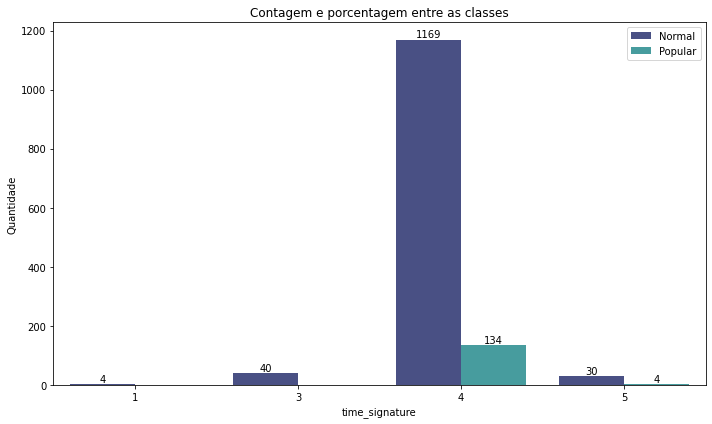

genero_primario_provavel


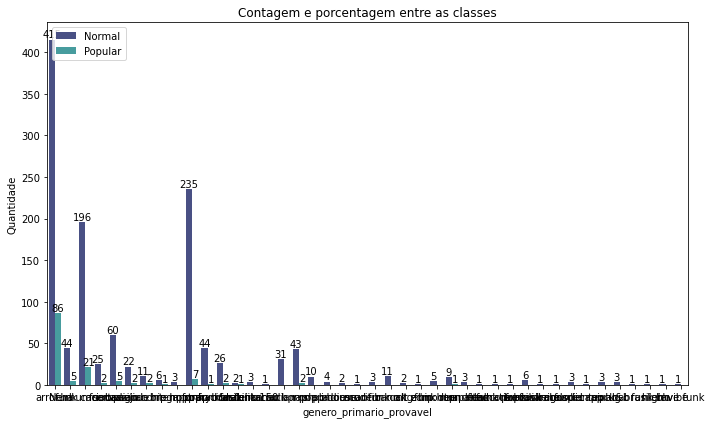

target_90_60


In [46]:
df_analise = df.copy

for variavel in df_categorica.columns:
    
    print(variavel)

    if variavel != var_target:

        # plot
        variavel_plot = variavel
        variavel_target = var_target
        plt.figure(figsize=(10,6))

        ax = sns.countplot(x=variavel_plot, hue=variavel_target, data=df, palette = 'mako')
        ax.set(ylabel='Quantidade', title='Contagem e porcentagem entre as classes')

        # add annotations
        for k, c in enumerate(ax.containers):


            # custom label calculates percent and add an empty string so 0 value bars don't have a number
            #labels = [f'{h/df.Exited.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
            lista_target_unico = sorted(df[variavel_target].unique(), reverse=False)
            lista_x_unico = sorted(df[variavel_plot].unique(), reverse=False)

            target = lista_target_unico[k]

            labels = []

            df_target_filtrado = df[(df[variavel_target]==target)]

            for p, i in enumerate(lista_x_unico):

                especifico = lista_x_unico[p]

                ocorrencias_total = df[(df[variavel_plot])==i][variavel_target].value_counts().sum()
                Exited_especifico = df_target_filtrado[(df_target_filtrado[variavel_plot])==i][variavel_target].value_counts().sum()
                #labels.append(f'{Exited_especifico/ocorrencias_total*100:0.1f}%')


            ax.bar_label(c, labels=labels, label_type='edge', fontsize = 10)

            ax.set(ylabel='Quantidade')
            


        plt.legend(['Normal', 'Popular'], fontsize = 10)
        plt.tight_layout()
        plt.show()

Insights em valores absolutos e relativos:

## 5.4 Analise bi-variada

### 5.4.1 Pairplots

In [660]:
#sns.pairplot(df, hue = var_target)
#plt.show()

- Exploraremos mais a fundo a análise bivariada com testes de hipoteses na seção abaixo

## 5.5 Testes de hipotese

### 5.4.1 Definições de funções: Técnica de bootstrapping

In [20]:
## Recebe 2 series data1 e data2, consolida o conjunto total de dados e faz 2 reamostragens aleatórias.

def sampling_bootstrap(data1,data2):
    
    ## Concatenacao dados
    data = np.concatenate((data1,data2))
    
    ## Permutacao dos dados
    permuted_data = np.random.permutation(data)
        
    ## Amostragem    
    sample1 = permuted_data[len(data1):] ## Primeira amostra do mesmo tamanho de data1
    sample2 = permuted_data[:len(data1)] ## Segunda amostra do mesmo tamanho de data2
    
    return sample1, sample2
    

In [21]:
## Recebe 2 series data1, data 2 cria um numero Size de replicatas da amostragem de bootstrap 
## e calcula uma função function para cada conjunto de 2 amostras.

def replicating_bootstrap(data1,data2,function,size=1):
    
    metrica_entre_samples = np.empty(size)
    
    for i in range(size):
        sample1, sample2 = sampling_bootstrap(data1,data2)
        
        ## Aplica a função ás duas amostras de bootstrap
        metrica_entre_samples[i] =  function(sample1,sample2)
        
    return metrica_entre_samples
        

In [22]:
## Calcula diferença entre a média de 2 amostras de bootstrap
def media_diff_2_amostras(sample1,sample2):
    media1 = np.mean(sample1)
    media2 = np.mean(sample2)
    
    diff = media1 - media2
    
    return diff

In [23]:
## Calcula p-valor entre a diferença da média empirica observada e a diferença da média de bootstrap em n simulações.

## P_Value: Qual a probabilidade da diferença da média empirica observada também ocorrer nas amostragens de bootstraps simuladas?
def p_value_bootstrap_and_empirical(data1,data2,n):
    
    ## Calculando a diferença da média empirica observada
    diff_empirica_medias_observadas = media_diff_2_amostras(data1,data2)

    ## Simulando n vezes a diferença da média observada em amostras de bootstrap.
    media_replicatas_bootstrap = replicating_bootstrap(data1,data2,media_diff_2_amostras,n)
    
    ## Quantas vezes a média de bootstrap foi superior á media empirica observada?
    n_ocorrencias_media_superior = np.sum(media_replicatas_bootstrap >= diff_empirica_medias_observadas)
    
    p_valor = n_ocorrencias_media_superior / n
    
    return p_valor

In [24]:
## Calcula intervalo de confiança dado alfa e métrica entre as amostras de bootstrap e tipo de teste bicaudal/mono.

def intervalo_confianca(metrica_entre_samples,alfa,tipo_teste):

    alfa_percentage = alfa*100
    
    if tipo_teste == 'bicaudal':
        alfa_aplicado = alfa_percentage/2
        complemento_alfa = 100 - alfa_aplicado
    else:
        alfa_aplicado = alfa_percentage
        complemento_alfa = 100 - alfa_aplicado
        
    confidence_interval = np.percentile(media_replicatas_bootstrap,[alfa_aplicado, complemento_alfa])
    limite_inferior_IV = confidence_interval[0]
    limite_superior_IV = confidence_interval[1]

    return limite_inferior_IV, limite_superior_IV

### H1: A taxa de inadimplência de cliente que NÃO adquiriram crédito consignado é maior em comparação aos que adquiriram: FALSO

In [25]:
nao_adquiriram = df[(df['fl_consig']==0)]['inadimpl_over30'] ##Grupo 1
adquiriram_credito = df[(df['fl_consig']==1)]['inadimpl_over30']  ##Grupo 2

grupo1 = nao_adquiriram
grupo2 = adquiriram_credito

print("A média do grupo 1 é {} e do grupo 2 é {}".format(grupo1.mean(), grupo2.mean()))

diff_empirica_medias_observadas = media_diff_2_amostras(grupo1,grupo2)

print("Há uma diferença média absoluta de {} na taxa de inadimplência entre os dois grupos".format(diff_empirica_medias_observadas))

A média do grupo 1 é 0.26905552117905157 e do grupo 2 é 0.2468553459119497
Há uma diferença média absoluta de 0.022200175267101885 na taxa de inadimplência entre os dois grupos


##### Teste

- H0: Não há diferença nas medias entre os grupos
- H1: Há diferença entre as médias dos grupos

In [26]:
n_simulacoes = 1000
alfa = 0.05
nivel_confianca = (1-alfa)*100


media_replicatas_bootstrap = replicating_bootstrap(grupo1,grupo2,media_diff_2_amostras,n_simulacoes)
p_valor = p_value_bootstrap_and_empirical(grupo1,grupo2,n_simulacoes)

alfa = 0.05
nivel_confianca = (1-alfa)*100

# P-valor denota a probabilidade de ocorrer os eventos observados das amostras empiricas nas amostras de bootstrap
# Ou seja, reflete a proporção de vezes em que os valores observados nas amostras empiricas ocorreram.
# Dessa forma, altos valores de p corroboram para rejeição da hipotese nula.

print("")
print("===================RESULTADO TESTES===================")
print("")

if p_valor < alfa:
    print("Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    print("P-valor = {}".format(p_valor))
    resultado_teste = "Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 
    
else:
    print("P-valor = {}".format(p_valor))
    print("A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    resultado_teste = "A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 


===================RESULTADO TESTES===================

P-valor = 0.094
A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com 95.0% de nivel de confianca


##### Plot

In [27]:
tipo_teste = 'bicaudal' ## bicaudal ou monocaudal'

limite_inferior_IV, limite_superior_IV = intervalo_confianca(media_replicatas_bootstrap,alfa, tipo_teste)
print(" Intervalo de confianca: de {} á {}".format(limite_inferior_IV, limite_superior_IV ))

 Intervalo de confianca: de -0.033600231802594194 á 0.036428686915429886


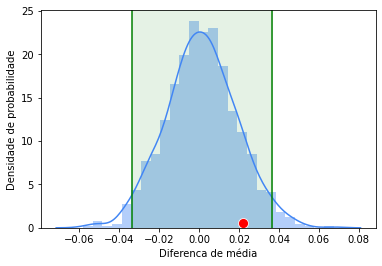

In [28]:
palette = sns.color_palette(['#4286f4','#f44141'])


axs = sns.distplot(media_replicatas_bootstrap, color = palette[0])

axs.axvline(limite_inferior_IV, color = 'green')
axs.axvline(limite_superior_IV, color = 'green')

axs.axvspan(limite_inferior_IV,limite_superior_IV , color = 'green', alpha = 0.1)

axs.set_ylabel('Densidade de probabilidade')
axs.set_xlabel('Diferenca de média')

axs = sns.scatterplot(x = np.array([diff_empirica_medias_observadas]), y = 0.5, s = 100, color = 'red')

Text(0.015, 0.022200175267101885, '0.022')

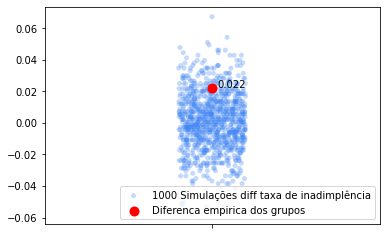

In [29]:
axs = sns.stripplot(y = media_replicatas_bootstrap, alpha = 0.3, palette = palette,
                   label = (str(n_simulacoes) + ' Simulações diff taxa de inadimplência'))
axs = sns.swarmplot(y = np.array([diff_empirica_medias_observadas]), color = 'red', size = 10, label = 'Diferenca empirica dos grupos')
axs.legend(loc='lower right')
axs.set_ylabel = ('Diferenca de taxa de inadimplencia')

diff_media_empirica_arredondada = round(diff_empirica_medias_observadas,3)
axs.annotate(str(diff_media_empirica_arredondada), xy=[0.015,diff_empirica_medias_observadas])

In [30]:
print(resultado_teste)

A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com 95.0% de nivel de confianca.
 P-valor = 0.094


### H2: A taxa de inadimplência de clientes que NÃO possuem veículos consignado é maior em comparação aos que possuem: VERDADEIRO

#### Teste

- H0: Não há diferença nas medias entre os grupos
- H1: Há diferença entre as médias dos grupos

In [31]:
## Definicao dos grupos
nao_possuem_veiculos = df[(df['fl_veiculos']==0)]['inadimpl_over30'] ##Grupo 1
possuem_veiculos = df[(df['fl_veiculos']==1)]['inadimpl_over30']  ##Grupo 2

grupo1 = nao_possuem_veiculos
grupo2 = possuem_veiculos

## Dados para simulacoes
n_simulacoes = 1000
alfa = 0.05
nivel_confianca = (1-alfa)*100




###################### Diferença entre os grupos
diff_empirica_medias_observadas = media_diff_2_amostras(grupo1,grupo2)
print("A média de {} registros do grupo 1 é {} e a média de {} registros do grupo 2 é {}".format(len(grupo1), grupo1.mean(), len(grupo2), grupo2.mean()))
print("Há uma diferença média absoluta de {} na taxa de inadimplência entre os dois grupos".format(diff_empirica_medias_observadas))


###################### TESTE
n_simulacoes = 1000
alfa = 0.05
nivel_confianca = (1-alfa)*100


media_replicatas_bootstrap = replicating_bootstrap(grupo1,grupo2,media_diff_2_amostras,n_simulacoes)
p_valor = p_value_bootstrap_and_empirical(grupo1,grupo2,n_simulacoes)

alfa = 0.05
nivel_confianca = (1-alfa)*100

# P-valor denota a probabilidade de ocorrer os eventos observados das amostras empiricas nas amostras de bootstrap
# Ou seja, reflete a proporção de vezes em que os valores observados nas amostras empiricas ocorreram.
# Dessa forma, altos valores de p corroboram para rejeição da hipotese nula.

print("")
print("===================RESULTADO TESTES===================")
print("")

if p_valor < alfa:
    print("Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    print("P-valor = {}".format(p_valor))
    resultado_teste = "Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 
    
else:
    print("P-valor = {}".format(p_valor))
    print("A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    resultado_teste = "A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 

A média de 17532 registros do grupo 1 é 0.270590919461556 e a média de 881 registros do grupo 2 é 0.2224744608399546
Há uma diferença média absoluta de 0.04811645862160141 na taxa de inadimplência entre os dois grupos

===================RESULTADO TESTES===================

Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com 95.0% de nivel de confianca
P-valor = 0.001


#### Plots

 Intervalo de confianca: de -0.03023477355368734 á 0.028178731001498647


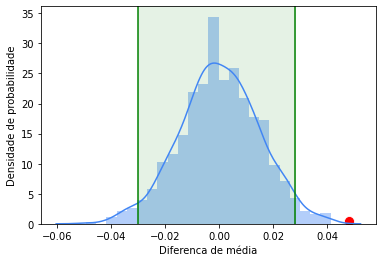

In [32]:
##################### PLOT EVIDÊNCIAS.
tipo_teste = 'bicaudal' ## bicaudal ou monocaudal'

limite_inferior_IV, limite_superior_IV = intervalo_confianca(media_replicatas_bootstrap,alfa, tipo_teste)
print(" Intervalo de confianca: de {} á {}".format(limite_inferior_IV, limite_superior_IV ))


######### PLOT 1 - DISTRIBUIÇÃO
palette = sns.color_palette(['#4286f4','#f44141'])


axs = sns.distplot(media_replicatas_bootstrap, color = palette[0])

axs.axvline(limite_inferior_IV, color = 'green')
axs.axvline(limite_superior_IV, color = 'green')

axs.axvspan(limite_inferior_IV,limite_superior_IV , color = 'green', alpha = 0.1)

axs.set_ylabel('Densidade de probabilidade')
axs.set_xlabel('Diferenca de média')

axs = sns.scatterplot(x = np.array([diff_empirica_medias_observadas]), y = 0.5, s = 100, color = 'red')

Text(0.015, 0.04811645862160141, '0.048')

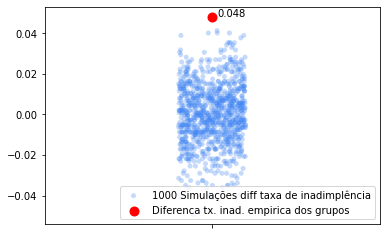

In [33]:
######### PLOT 2 - SWARM
axs2 = sns.stripplot(y = media_replicatas_bootstrap, alpha = 0.3, palette = palette,
                   label = (str(n_simulacoes) + ' Simulações diff taxa de inadimplência'))
axs2 = sns.swarmplot(y = np.array([diff_empirica_medias_observadas]), color = 'red', size = 10, label = 'Diferenca tx. inad. empirica dos grupos')
axs2.legend(loc='lower right')
axs2.set_ylabel = ('Diferenca de taxa de inadimplencia')

diff_media_empirica_arredondada = round(diff_empirica_medias_observadas,3)
axs2.annotate(str(diff_media_empirica_arredondada), xy=[0.015,diff_empirica_medias_observadas])

In [34]:
print(resultado_teste)

Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com 95.0% de nivel de confianca.
 P-valor = 0.001


### H3: A taxa de inadimplência de clientes que possuem conta ativa é maior em comparação aos não possuem: FALSO

#### Teste

- H0: Não há diferença nas medias entre os grupos
- H1: Há diferença entre as médias dos grupos

In [35]:
## Definicao dos grupos
possuem_conta_ativa = df[(df['flagcontaativabd']==1)]['inadimpl_over30']  ##Grupo 2
nao_possuem_conta_ativa = df[(df['flagcontaativabd']==0)]['inadimpl_over30'] ##Grupo 1

grupo1 = possuem_conta_ativa
grupo2 = nao_possuem_conta_ativa


## Dados para simulacoes
n_simulacoes = 1000
alfa = 0.05
nivel_confianca = (1-alfa)*100




###################### Diferença entre os grupos
diff_empirica_medias_observadas = media_diff_2_amostras(grupo1,grupo2)
print("A média de {} registros do grupo 1 é {} e a média de {} registros do grupo 2 é {}".format(len(grupo1), grupo1.mean(), len(grupo2), grupo2.mean()))
print("Há uma diferença média absoluta de {} na taxa de inadimplência entre os dois grupos".format(diff_empirica_medias_observadas))


###################### TESTE
n_simulacoes = 1000
alfa = 0.05
nivel_confianca = (1-alfa)*100


media_replicatas_bootstrap = replicating_bootstrap(grupo1,grupo2,media_diff_2_amostras,n_simulacoes)
p_valor = p_value_bootstrap_and_empirical(grupo1,grupo2,n_simulacoes)

alfa = 0.05
nivel_confianca = (1-alfa)*100

# P-valor denota a probabilidade de ocorrer os eventos observados das amostras empiricas nas amostras de bootstrap
# Ou seja, reflete a proporção de vezes em que os valores observados nas amostras empiricas ocorreram.
# Dessa forma, altos valores de p corroboram para rejeição da hipotese nula.

print("")
print("===================RESULTADO TESTES===================")
print("")

if p_valor < alfa:
    print("Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    print("P-valor = {}".format(p_valor))
    resultado_teste = "Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 
    
else:
    print("P-valor = {}".format(p_valor))
    print("A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    resultado_teste = "A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 

A média de 13317 registros do grupo 1 é 0.29503641961402716 e a média de 5096 registros do grupo 2 é 0.19839089481946626
Há uma diferença média absoluta de 0.0966455247945609 na taxa de inadimplência entre os dois grupos

===================RESULTADO TESTES===================

Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com 95.0% de nivel de confianca
P-valor = 0.0


#### Plots

 Intervalo de confianca: de -0.013627063909765133 á 0.014326124856167022


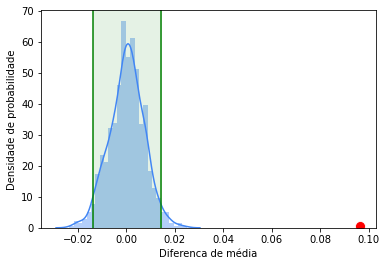

In [36]:
##################### PLOT EVIDÊNCIAS.
tipo_teste = 'bicaudal' ## bicaudal ou monocaudal'

limite_inferior_IV, limite_superior_IV = intervalo_confianca(media_replicatas_bootstrap,alfa, tipo_teste)
print(" Intervalo de confianca: de {} á {}".format(limite_inferior_IV, limite_superior_IV ))


######### PLOT 1 - DISTRIBUIÇÃO
palette = sns.color_palette(['#4286f4','#f44141'])


axs = sns.distplot(media_replicatas_bootstrap, color = palette[0])

axs.axvline(limite_inferior_IV, color = 'green')
axs.axvline(limite_superior_IV, color = 'green')

axs.axvspan(limite_inferior_IV,limite_superior_IV , color = 'green', alpha = 0.1)

axs.set_ylabel('Densidade de probabilidade')
axs.set_xlabel('Diferenca de média')

axs = sns.scatterplot(x = np.array([diff_empirica_medias_observadas]), y = 0.5, s = 100, color = 'red')

Text(0.015, 0.0966455247945609, '0.097')

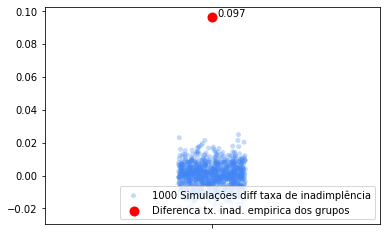

In [37]:
######### PLOT 2 - SWARM
axs2 = sns.stripplot(y = media_replicatas_bootstrap, alpha = 0.3, palette = palette,
                   label = (str(n_simulacoes) + ' Simulações diff taxa de inadimplência'))
axs2 = sns.swarmplot(y = np.array([diff_empirica_medias_observadas]), color = 'red', size = 10, label = 'Diferenca tx. inad. empirica dos grupos')
axs2.legend(loc='lower right')
axs2.set_ylabel = ('Diferenca de taxa de inadimplencia')

diff_media_empirica_arredondada = round(diff_empirica_medias_observadas,3)
axs2.annotate(str(diff_media_empirica_arredondada), xy=[0.015,diff_empirica_medias_observadas])

In [38]:
print(resultado_teste)

Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com 95.0% de nivel de confianca.
 P-valor = 0.0


### H4: A taxa de inadimplência de clientes pertencentes á faixa etária abaixo de 39 anos  é maior: VERDADEIRO

#### Teste

- H0: Não há diferença nas medias entre os grupos
- H1: Há diferença entre as médias dos grupos

In [39]:
## Definicao dos grupos
abaixo_39 = df[(df['idade_serasa']<=39)]['inadimpl_over30'] ##Grupo 1
acima_39 = df[(df['idade_serasa']>=39)]['inadimpl_over30']  ##Grupo 2


grupo1 = abaixo_39
grupo2 = acima_39


## Dados para simulacoes
n_simulacoes = 1000
alfa = 0.05
nivel_confianca = (1-alfa)*100




###################### Diferença entre os grupos
diff_empirica_medias_observadas = media_diff_2_amostras(grupo1,grupo2)
print("A média de {} registros do grupo 1 é {} e a média de {} registros do grupo 2 é {}".format(len(grupo1), grupo1.mean(), len(grupo2), grupo2.mean()))
print("Há uma diferença média absoluta de {} na taxa de inadimplência entre os dois grupos".format(diff_empirica_medias_observadas))


###################### TESTE
n_simulacoes = 1000
alfa = 0.05
nivel_confianca = (1-alfa)*100


media_replicatas_bootstrap = replicating_bootstrap(grupo1,grupo2,media_diff_2_amostras,n_simulacoes)
p_valor = p_value_bootstrap_and_empirical(grupo1,grupo2,n_simulacoes)

alfa = 0.05
nivel_confianca = (1-alfa)*100

# P-valor denota a probabilidade de ocorrer os eventos observados das amostras empiricas nas amostras de bootstrap
# Ou seja, reflete a proporção de vezes em que os valores observados nas amostras empiricas ocorreram.
# Dessa forma, altos valores de p corroboram para rejeição da hipotese nula.

print("")
print("===================RESULTADO TESTES===================")
print("")

if p_valor < alfa:
    print("Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    print("P-valor = {}".format(p_valor))
    resultado_teste = "Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 
    
else:
    print("P-valor = {}".format(p_valor))
    print("A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    resultado_teste = "A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 

A média de 12056 registros do grupo 1 é 0.2845885865958859 e a média de 6933 registros do grupo 2 é 0.23813644886773402
Há uma diferença média absoluta de 0.04645213772815185 na taxa de inadimplência entre os dois grupos

===================RESULTADO TESTES===================

Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com 95.0% de nivel de confianca
P-valor = 0.0


#### Plots

 Intervalo de confianca: de -0.013056096407064677 á 0.01354146507365839


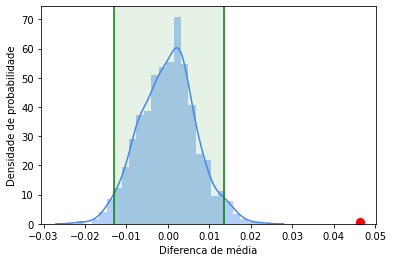

In [40]:
##################### PLOT EVIDÊNCIAS.
tipo_teste = 'bicaudal' ## bicaudal ou monocaudal'

limite_inferior_IV, limite_superior_IV = intervalo_confianca(media_replicatas_bootstrap,alfa, tipo_teste)
print(" Intervalo de confianca: de {} á {}".format(limite_inferior_IV, limite_superior_IV ))


######### PLOT 1 - DISTRIBUIÇÃO
palette = sns.color_palette(['#4286f4','#f44141'])


axs = sns.distplot(media_replicatas_bootstrap, color = palette[0])

axs.axvline(limite_inferior_IV, color = 'green')
axs.axvline(limite_superior_IV, color = 'green')

axs.axvspan(limite_inferior_IV,limite_superior_IV , color = 'green', alpha = 0.1)

axs.set_ylabel('Densidade de probabilidade')
axs.set_xlabel('Diferenca de média')

axs = sns.scatterplot(x = np.array([diff_empirica_medias_observadas]), y = 0.5, s = 100, color = 'red')

Text(0.015, 0.04645213772815185, '0.046')

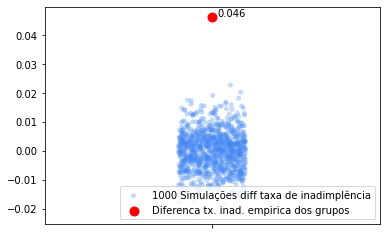

In [41]:
######### PLOT 2 - SWARM
axs2 = sns.stripplot(y = media_replicatas_bootstrap, alpha = 0.3, palette = palette,
                   label = (str(n_simulacoes) + ' Simulações diff taxa de inadimplência'))
axs2 = sns.swarmplot(y = np.array([diff_empirica_medias_observadas]), color = 'red', size = 10, label = 'Diferenca tx. inad. empirica dos grupos')
axs2.legend(loc='lower right')
axs2.set_ylabel = ('Diferenca de taxa de inadimplencia')

diff_media_empirica_arredondada = round(diff_empirica_medias_observadas,3)
axs2.annotate(str(diff_media_empirica_arredondada), xy=[0.015,diff_empirica_medias_observadas])

In [42]:
print(resultado_teste)

Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com 95.0% de nivel de confianca.
 P-valor = 0.0


Reservaremos 20% dos dados para testes respeitando as proporções de exemplos de clientes inadimplentes/normais da base total

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop([var_target,'media_pop_corrigida_30' ], axis=1)
y = df[var_target]

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
y_test.value_counts()

0    275
1     69
Name: target_80_30, dtype: int64

Reservaremos 20% dos dados de treino/valid para validação respeitando as proporções de exemplos de clientes inadimplentes/normais da base total

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid,test_size=0.2,random_state = 0, stratify = y_train_valid)
y_valid.value_counts()

0    220
1     55
Name: target_80_30, dtype: int64

# 6 PRÉ-PROCESSAMENTO: LABEL ENCODER

- **genero_primario_provavel**: É categórico e não ordinal
- **key**: É categórico e ordinal
- **mode**: É categórico e binário
- **time_signature**: É categórico e ordinal (quantas batidas)


**time_signature** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

## 6.1 Label Encoder

In [47]:
from sklearn.preprocessing import LabelEncoder
features_encoder = ['genero_primario_provavel']

enc = LabelEncoder()

for feature in features_encoder:
    
    ## Fit em todas ocorrências de genero
    enc.fit(df[feature])
    
    #Transform df
    df_lenc_feature = enc.transform(df[feature])

    ## Atualiza a feature encodada
    df[feature] = df_lenc_feature

df[feature]

0        3
1        3
2        0
3        3
4        3
        ..
1376    18
1377    40
1378    36
1379     3
1380    30
Name: genero_primario_provavel, Length: 1381, dtype: int32

# 7 AMOSTRAGEM ESTRATIFICADA POR TARGET: 44 Train, 16% Valid, 20% Test

In [23]:
## Recompoe df a partir de X e Y

def recompor_df(X,y):
    y_df = y.to_frame().reset_index()
    X_df = X.reset_index()
    df = X_df.merge(y_df)
    df = df.drop(columns=['index'])
    
    return df

In [24]:
from sklearn.model_selection import train_test_split

dict_amostras = {}

for target in var_target:
    
    X = df.drop([target,'media_pop_corrigida_30'], axis=1)
    y = df[target]

    ## 20% test
    X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    y_test.value_counts()
    
    
    ## 16% valid
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid,test_size=0.2,random_state = 0, stratify = y_train_valid)
    y_valid.value_counts()
    
    
    df_train = recompor_df(X_train,y_train)
    df_valid = recompor_df(X_valid,y_valid)
    df_test = recompor_df(X_test,y_test)

    dict_amostras[target] = [df_train, df_valid, df_test]

In [25]:
len(dict_amostras['target_80_120'][0]), len(dict_amostras['target_80_120'][1]), len(dict_amostras['target_80_120'][2])

(883, 221, 277)

# 8 SELECAO DE FEATURES

- Para todos os métodos aplicados, utilizaremos a base de TREINO para selecionar as variáveis.

## 8.1 Correlação de Pearson

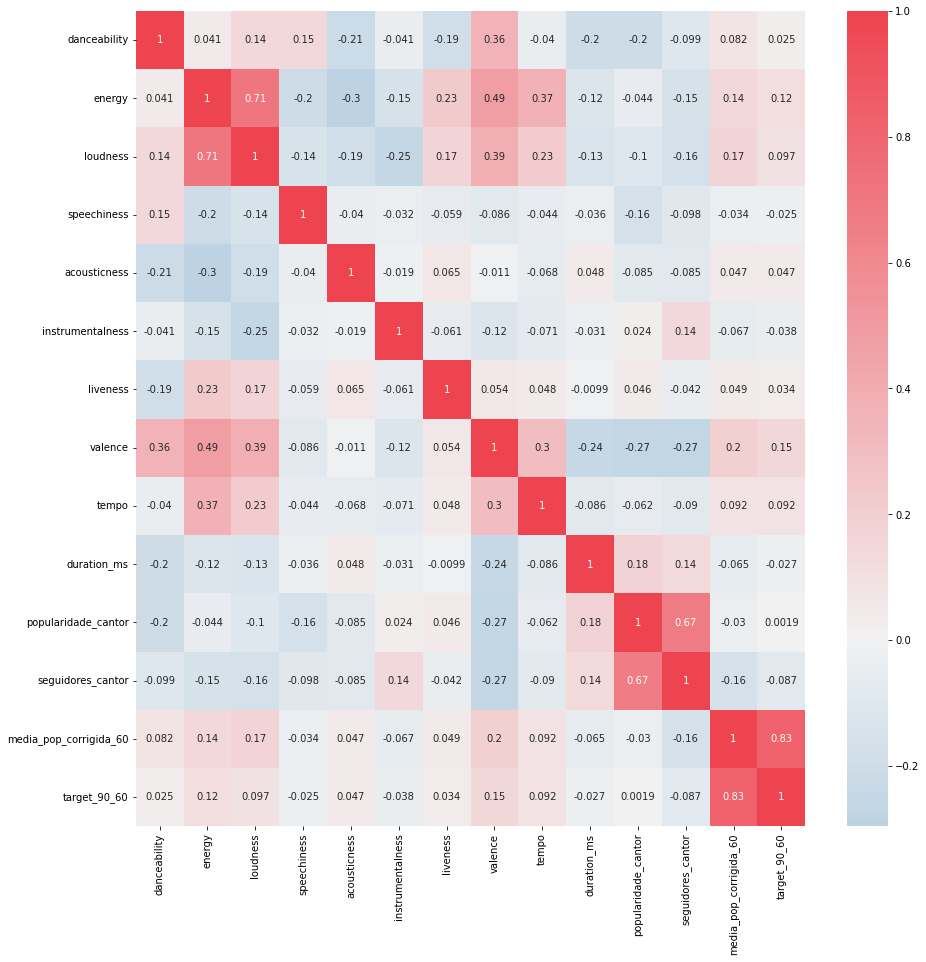

In [48]:
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(240, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(df_continua.corr(),annot=True, cmap=cmap, center=0)
plt.show()

De acordo com a tabela de referência abaixo:

| Correlação | Interpretacao   |
|------|------|
|   0.00 | Ausência de correlação|
|   0.01 a 0.019 | Correlação muito fraca|
|   0.20 a 0.39| Correlação fraca|
|   0.4 a 0.69 | Correlação moderada|
|   0.7 a 0.89 | Correlação forte|
|   0.9 a 0.99 | Correlação muito forte|
|   1.00 | Correlação perfeitaa|


- 

**Vale ressaltar que as variáveis podem ter uma relação não linear com a variável alvo, portanto, é necessário aplicar outros métodos para avaliar o potencial preditor de cada feature.**


## 8.2 Features Importance - Random Forest

In [753]:
from sklearn.ensemble import RandomForestClassifier

In [754]:
## Model
clf = RandomForestClassifier(random_state=1, n_jobs=-1)

X_train = df_train.drop([var_target],axis=1)
y_train = df_train[var_target]

##Fit
clf.fit(X_train,y_train)

## Variaveis para plotar
features_names = X.columns.tolist()
class_names = ['Normal','Popular']

In [755]:
feature_imp = pd.Series(clf.feature_importances_,index=features_names).sort_values(ascending=False)

### Plot

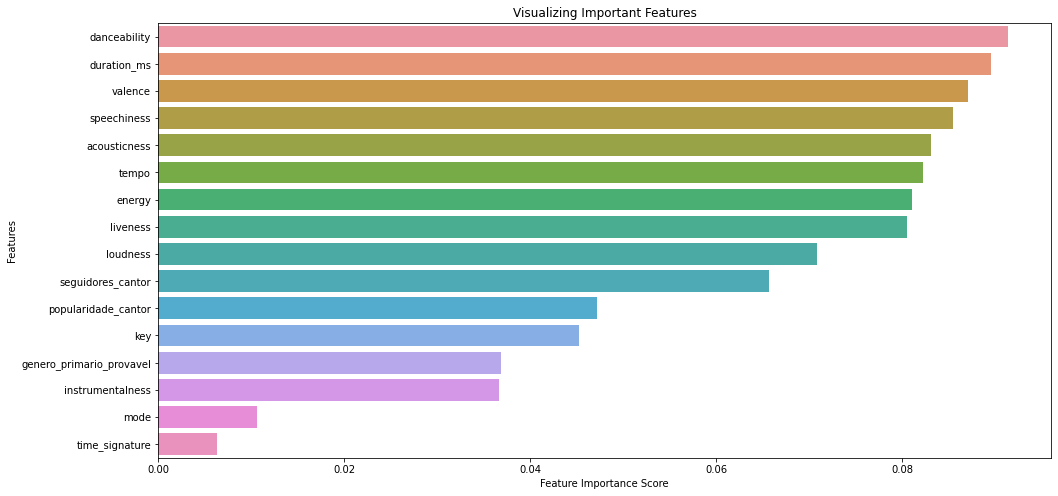

In [756]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
    
visualiza_features_importantes(feature_imp)

### Ranking Features

In [758]:
ranking_features = []

for num, importance in enumerate(feature_imp):
    ranking = num+1
    nome_feature = feature_imp.index[num]
    importance = importance
    
    ranking_features.append(np.array( [ranking,nome_feature,importance] ) )

ranking_features_df = pd.DataFrame(np.array(ranking_features), columns=['Rank','Feature','Importance'])
ranking_features_df

,Rank,Feature,Importance
0,1,danceability,0.09142810816877775
1,2,duration_ms,0.08959075495069127
2,3,valence,0.08712782001130347
3,4,speechiness,0.08545002032611772
4,5,acousticness,0.08307563526477861
5,6,tempo,0.08221289756962728
6,7,energy,0.08105516037723694
7,8,liveness,0.08054828803886614
8,9,loudness,0.07082199842099188
9,10,seguidores_cantor,0.06572018861377873


## 8.3 Information Value (IV)

Information Value é uma técnica para avaliar a separabilidade das classes em variáveis categóricas mensurando a relação de eventos e não eventos para cada categoria.

É possível aplicá-la também em variáveis contínuas, aplicando, para isso uma discretização antes.

A fim de facilitar sua implementação, aplicaremos a técnica com auxílio da biblioteca [XVerse](https://github.com/Sundar0989/XuniVerse). Essa biblioteca tenta discretizar as variáveis contínuas selecionando a quantidade de bins de forma a deixar a taxa de eventos/nao eventos crescente ou decrescente.

In [773]:
from xverse.transformer import MonotonicBinning

clf = MonotonicBinning()
clf.fit(X_train, y_train)

#print(clf.bins)
output_bins = clf.bins #will be used later in this exercise

In [774]:
clf = MonotonicBinning(custom_binning=output_bins) #output_bins was created earlier

out_X = clf.transform(X_train)
out_X.head()

,key,mode,time_signature,genero_primario_provavel,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularidade_cantor,seguidores_cantor
0,"(8.0, 11.0]",1,4,"(-0.001, 3.0]","(0.629, 0.727]","(0.779, 0.986]","(-4.34, 1.509]","(0.0509, 0.089]","(0.205, 0.436]","(-0.001, 0.927]","(0.222, 0.989]","(0.537, 0.751]","(119.975, 147.836]","(164457.667, 190533.667]","(65.0, 75.0]","(6220557.0, 99612041.0]"
1,"(-0.001, 4.0]",0,4,"(3.0, 31.0]","(0.274, 0.629]","(0.127, 0.616]","(-18.032, -6.345]","(0.0509, 0.089]","(-0.000714, 0.205]","(-0.001, 0.927]","(0.105, 0.222]","(0.031, 0.537]","(65.13499999999999, 119.975]","(190533.667, 744727.0]","(75.0, 95.0]","(6220557.0, 99612041.0]"
2,"(-0.001, 4.0]",1,4,"(31.0, 43.0]","(0.727, 0.962]","(0.779, 0.986]","(-4.34, 1.509]","(0.0509, 0.089]","(0.205, 0.436]","(-0.001, 0.927]","(0.012400000000000001, 0.105]","(0.751, 0.97]","(119.975, 147.836]","(190533.667, 744727.0]","(75.0, 95.0]","(6220557.0, 99612041.0]"
3,"(-0.001, 4.0]",1,4,"(-0.001, 3.0]","(0.727, 0.962]","(0.779, 0.986]","(-4.34, 1.509]","(0.089, 0.879]","(0.205, 0.436]","(-0.001, 0.927]","(0.222, 0.989]","(0.751, 0.97]","(65.13499999999999, 119.975]","(164457.667, 190533.667]","(75.0, 95.0]","(6220557.0, 99612041.0]"
4,"(-0.001, 4.0]",1,4,"(-0.001, 3.0]","(0.629, 0.727]","(0.779, 0.986]","(-4.34, 1.509]","(0.024399999999999998, 0.0509]","(0.436, 0.974]","(-0.001, 0.927]","(0.222, 0.989]","(0.537, 0.751]","(147.836, 201.823]","(164457.667, 190533.667]","(-0.001, 65.0]","(1205885.0, 6220557.0]"


In [775]:
from xverse.transformer import WOE
clf = WOE()
clf.fit(X_train, y_train)
clf.woe_df # weight of evidence transformation dataset. This dataset will be used in making bivariate charts as well. 
clf.iv_df #information value dataset

,Variable_Name,Information_Value
13,tempo,0.03
2,duration_ms,0.02
15,valence,0.02
12,speechiness,0.02
14,time_signature,0.02
6,key,0.02
7,liveness,0.02
0,acousticness,0.01
11,seguidores_cantor,0.01
8,loudness,0.01


De acordo com a tabela de referência abaixo extraida do XVerse:

| Information Value | Variable Predictiveness   |
|------|------|
|   Less than 0.02  | Not useful for prediction |
|   0.02 to 0.1 | Weak predictive Power|
|   0.1 to 0.3 | Medium predictive Power |
|   0.3 to 0.5 | Strong predictive Power|
|   >0.5 | Suspicious Predictive Power|

- fl_consig, fl_veiculos, vr_exposicao_total_cartao, renda, idade_serasa são preditores ruins;
- limite_cartao, flagcontaativabd são preditores fracos;
- score_h4 é um preditor forte
- score_h5, score_h2, score_h3, score_h1 são preditores muito fortes (e potencialmente suspeitos de leakage).

### Plots

In [776]:
df_iv_plot = clf.iv_df
#df_iv_plot.head()

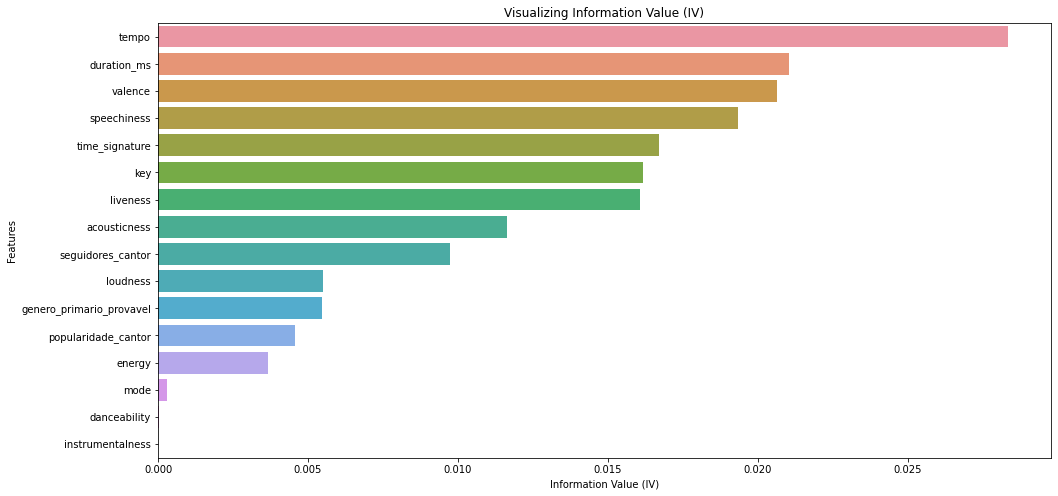

In [777]:
%matplotlib inline

plt.figure(figsize=(16,8))
sns.barplot(x='Information_Value', y = 'Variable_Name', data = df_iv_plot)

plt.xlabel('Information Value (IV)')
plt.ylabel('Features')
plt.title("Visualizing Information Value (IV)")
plt.show()

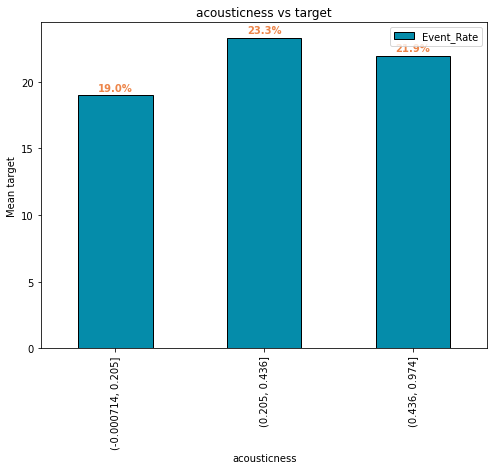

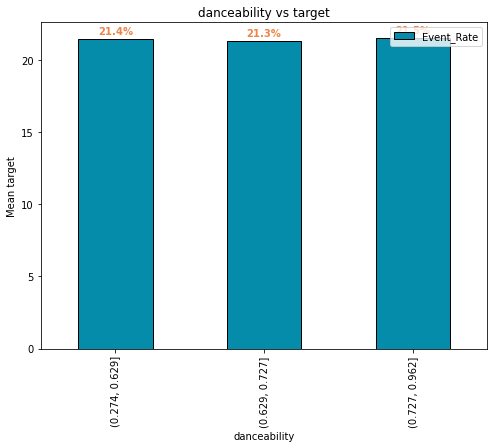

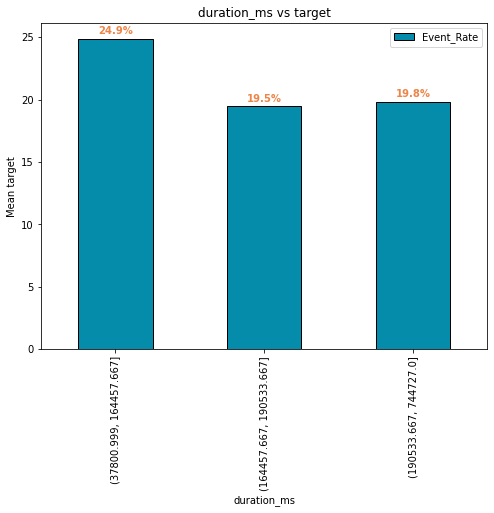

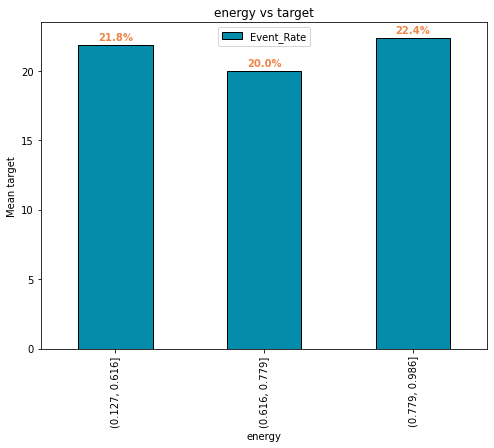

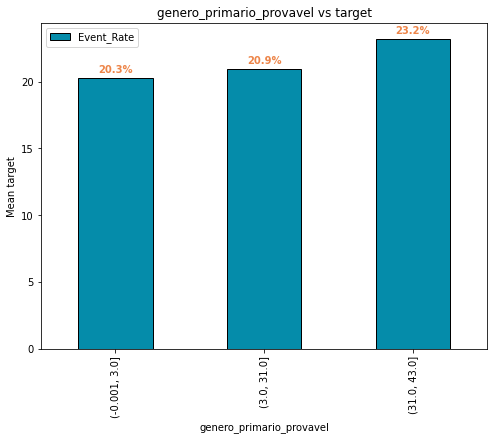

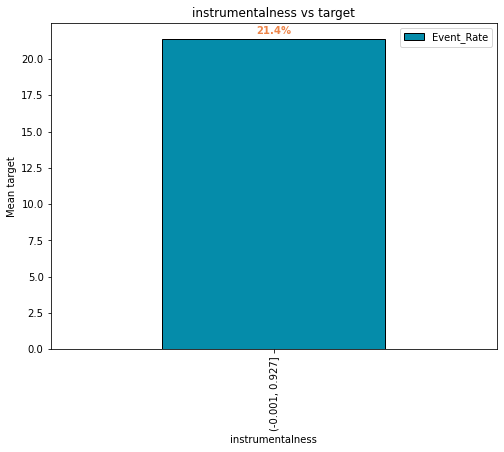

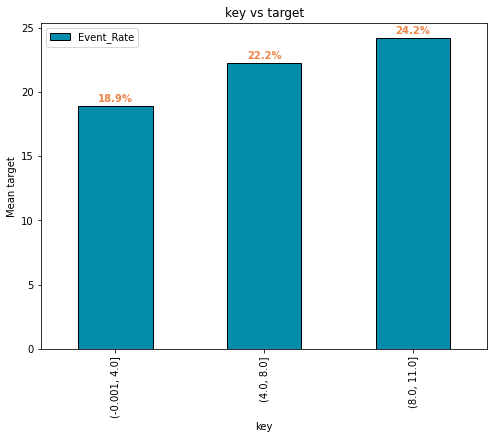

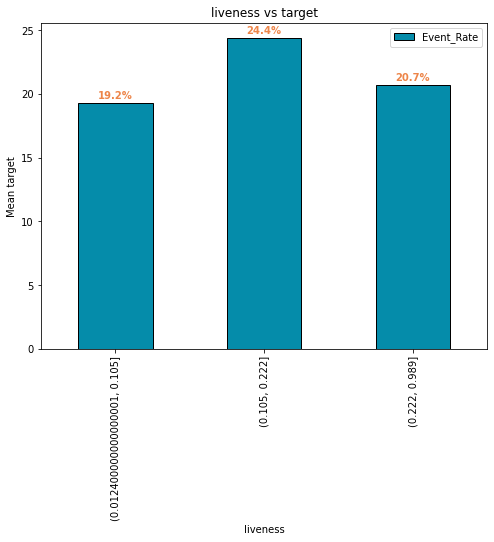

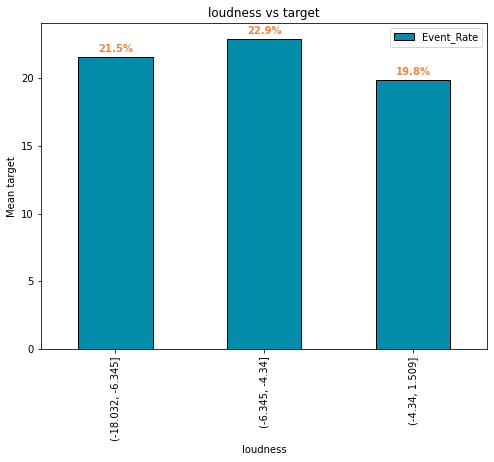

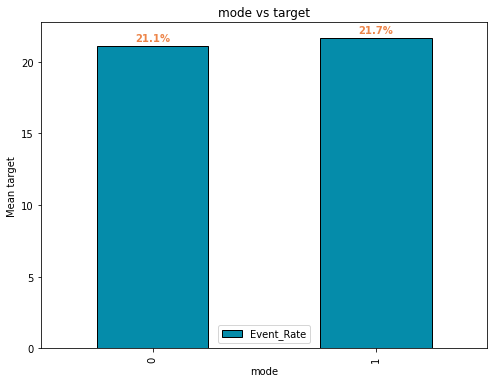

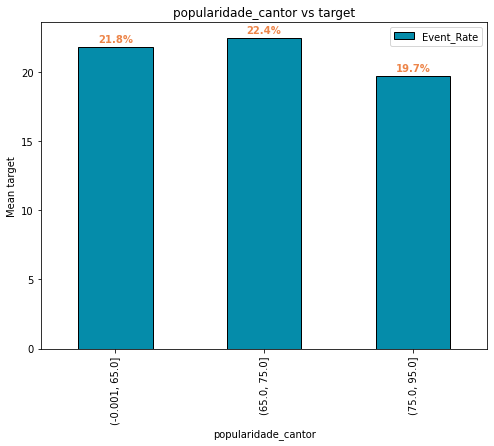

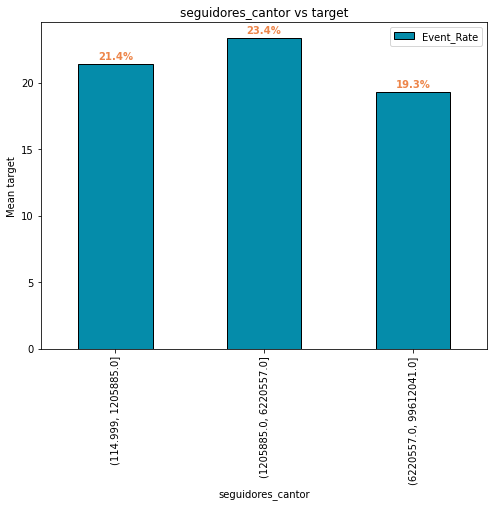

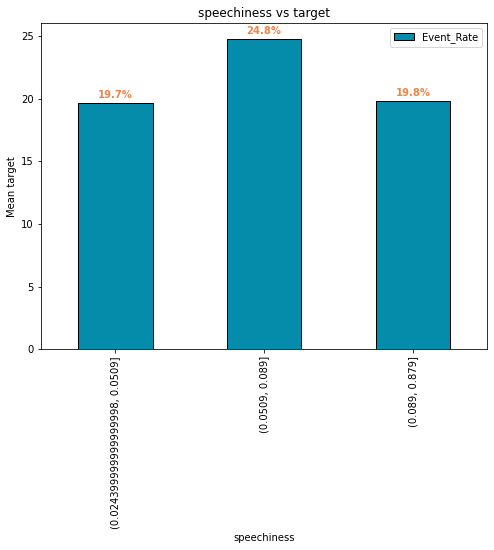

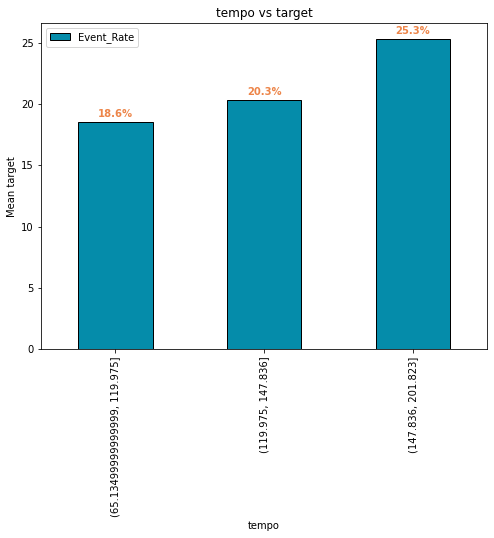

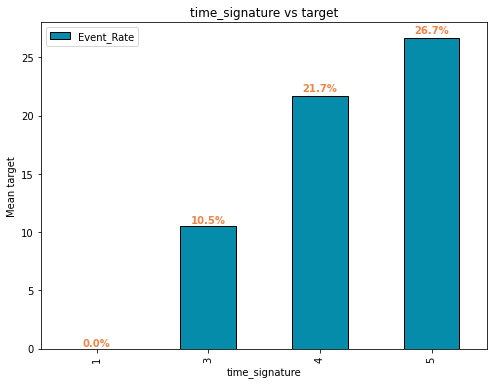

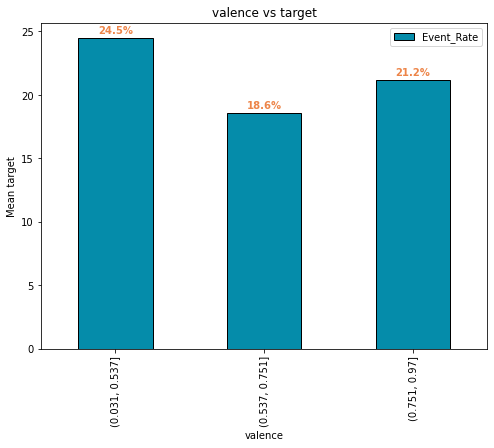

BarCharts(bar_type='v')

In [778]:
woe_df = clf.woe_df
from xverse.graph import BarCharts
clf = BarCharts(bar_type='v')
clf.plot(woe_df)

- As variáveis contínuas foram separadas em 3 bins para o calculo do IV

## 8.4 Biblioteca XVerse: Compilado de técnicas

Na Biblioteca [XVerse](https://github.com/Sundar0989/XuniVerse) há recursos para aplicar um compilado de métodos para auxiliar na seleção dos melhores preditores de acordo com as técnicas de:

- Information Value
- Features Importance (RandomForest e ExtraTrees)
- Recursive feature elimination (RFE)
- Chi Square (Qui Quadrado)
- L1 based feature selection

In [779]:
from xverse.ensemble import VotingSelector
clf = VotingSelector()
clf.fit(X_train, y_train)

VotingSelector(no_of_features=8,
               selection_techniques=['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE'])

In [780]:
clf.feature_importances_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One
0,tempo,0.03,0.08,-0.00,0.07,0.37,-0.00
1,duration_ms,0.02,0.09,-0.00,0.08,0.02,-0.00
2,valence,0.02,0.09,0.00,0.07,0.09,0.00
3,speechiness,0.02,0.09,0.00,0.08,0.01,0.00
4,time_signature,0.02,0.01,-0.00,0.01,0.02,0.00
5,key,0.02,0.04,-0.00,0.07,0.67,0.00
6,liveness,0.02,0.07,0.00,0.07,0.11,0.00
7,acousticness,0.01,0.09,0.00,0.08,0.02,0.00
8,seguidores_cantor,0.01,0.06,-0.00,0.06,0.53,0.00
9,loudness,0.01,0.07,0.00,0.07,0.00,0.00


In [781]:
clf.feature_votes_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One,Votes
0,tempo,1,1,1,1,1,1,6
1,duration_ms,1,1,1,1,0,1,5
2,valence,1,1,0,1,1,1,5
3,speechiness,1,1,0,1,0,1,4
5,key,1,0,1,0,1,1,4
6,liveness,1,1,0,1,1,0,4
7,acousticness,1,1,0,1,0,0,3
8,seguidores_cantor,0,0,1,0,1,1,3
10,genero_primario_provavel,0,0,1,0,1,1,3
14,danceability,0,1,0,1,1,0,3


De acordo com o compilado das técnicas as melhores features preditoras são em ordem:
    
    - tempo  
    -
    -
    -
    

# 9 PROTOTIPAÇÃO

## 9.1 Pré-seleção de modelos com a biblioteca LazyPredict com Validação Cruzada.

- Iremos aplicar a técnica de undersampling (NearMiss) para alimentar os modelos com dados em proporções diferentes de exemplos das classe 1 / exemplos classe 2 para não descartarmos modelos que perfomariam bem nessas condições.


- Iremos aplicar PCA variando de 1 á 15  para não descartarmos nessa etapa modelos que performariam bem com a variação do número de features selecionadas;


- Iremos testar a aplicação de scalers para não descartarmos nessa etapa modelos que performariam bem nessas condições.


- A fim de simular uma validação cruzada com 10 Folds, o experimento será repetido 10x e cada repetição os modelos serão treinados com um conjunto distinto composto por 80% dos dados de treino e avaliados sobre o conjunto de validação.

In [114]:
proporcao_minority_majority = y_train.value_counts()[1]/y_train.value_counts()[0]
print("A proporção dos exemplos na base de treino é de {}".format(proporcao_minority_majority))

A proporção dos exemplos na base de treino é de 0.11069182389937107


In [115]:
fator_balanc = ['N/A', 0.3,0.5,0.7,0.85,1]
print("Proporções testadas na prototipacao = {}".format(fator_balanc))

Proporções testadas na prototipacao = ['N/A', 0.3, 0.5, 0.7, 0.85, 1]


In [116]:
tecnicas_balanc = ['UnderSampling','OverSampling']
print("numero de tecnicas testadas = {}".format(len(tecnicas_balanc)))

numero de tecnicas testadas = 2


In [117]:
## num_reducoes_pca será o numero de colunas dividido por 3..
iteracoes_num_reducoes_pca = 3
print("Número de reduções com PCA testadas na prototipação = {}".format(iteracoes_num_reducoes_pca))

Número de reduções com PCA testadas na prototipação = 3


In [119]:
repeticoes = 5

numero_targets = len(dict_amostras)
numero_iteracoes_por_loop = ( 2 + iteracoes_num_reducoes_pca*2 ) * numero_targets
numero_iteracoes = numero_iteracoes_por_loop * len(fator_balanc) * repeticoes
print("Número total de iteracoes = {}".format(numero_iteracoes))

Número total de iteracoes = 1920


In [120]:
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import NearMiss
    
df_models_valid = pd.DataFrame()
lista_todas_targets = list(dict_amostras.keys())

#Loop numero de repetições do experimento
for rep in range(repeticoes):
    
   ##Loop do fator de balanceamento: 
    for fator in fator_balanc:
             
        ## Loop do tipo de encoder aplicado nos dados
        for target in dict_amostras.keys():
            
            print("Iterando repetição = {} - fator de balanc = {} - target = {}".format(rep, fator, target)) 
            
            df_train = dict_amostras[target][0]
            df_valid = dict_amostras[target][1]
            df_test = dict_amostras[target][2]

            ##Definindo os dados
            X_train = df_train.drop(lista_todas_targets,axis=1)
            y_train = df_train[target]
            
            X_valid = df_valid.drop(lista_todas_targets,axis=1)
            y_valid = df_valid[target]
            
            X_test =  df_test.drop(lista_todas_targets,axis=1)
            y_test = df_test[target]
         
            ## Holdout aleatório: Cada repetição irá treinar com um conjunto distinto de 80% dos dados de treino.
            X_train2, X_descarte, y_train2, y_descarte = train_test_split(X_train, y_train, test_size=0.2, random_state=rep, stratify=y_train)

            ## Redefinindo os dados para ficar mesmo índice de X_train
            #Dados Valid
            X_valid2 = X_valid
            y_valid2 = y_valid

            
            ## Looop técnica de balanceamento            
            for tecnica in tecnicas_balanc:
         
                if tecnica == 'UnderSampling':

                    if fator != "N/A":
                        
                        ##Balanceando: APENAS DADOS DE TREINO
                        nr = NearMiss(sampling_strategy=fator)
                        X_train_balanc, y_train_balanc = nr.fit_resample(X_train2, y_train2)
                        
                    else:
                        X_train_balanc = X_train2
                        y_train_balanc = y_train2
                        tecnica = 'N/A'
                     
                if tecnica == 'OverSampling':

                    if fator != "N/A":
                        
                        ##Balanceando: APENAS DADOS DE TREINO  
                        smt = SMOTE(sampling_strategy = fator)
                        X_train_balanc, y_train_balanc = smt.fit_resample(X_train2, y_train2)  
                        
                else:
                        X_train_balanc = X_train2
                        y_train_balanc = y_train2
                        tecnica = 'N/A'
 
                    
                #Dados de treino balanceados
                X_train4 = X_train_balanc
                y_train4 = y_train_balanc

                # Normalizando - FIT APENAS TREINO
                scaler = StandardScaler()
                scaler.fit(X_train4)

                ## Transform dados VALID e TREINO
                X_train_norm = scaler.transform(X_train4) 
                X_valid_norm = scaler.transform(X_valid2) 


                ########################### Previsao dados valid ###########################
                #Treinando e avaliando dados nao normalizados
                clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
                models,predictions = clf.fit(X_train4, X_valid2, y_train4, y_valid2)
                models['n_PCA'] = "N/A"
                models['target'] = target
                models['tecnica_balanc'] = tecnica
                models['Fator_balanc'] = fator
                models['Normalizacao'] = "NAO"
                df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)

                #Treinando e avaliando dados normalizados
                clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
                models,predictions = clf.fit(X_train_norm, X_valid_norm, y_train4, y_valid2)
                models['n_PCA'] = "N/A"
                models['target'] = target
                models['tecnica_balanc'] = tecnica
                models['Fator_balanc'] = fator
                models['Normalizacao'] = "SIM"
                df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)


                ### Loop para aplicação de PCA, dependente da aplicação do encoder.
                num_reducoes_pca = [red for red in range(1,len(X_train4.columns),int(len(X_train4.columns)/5))]                
                for num_reducoes in num_reducoes_pca:

                    #Aplicando PCA sobre dados nao normalizados - FIT APENAS TREINO
                    pca = PCA(n_components=num_reducoes)            
                    pca.fit(X_train4,y_train4)

                    ## Transform dados VALID e TREINO
                    X_train_pca = pca.transform(X_train4)
                    X_valid_pca = pca.transform(X_valid2)


                    #Aplicando PCA sobre dados normalizados - FIT APENAS TREINO
                    pca = PCA(n_components=num_reducoes)            
                    pca.fit(X_train_norm,y_train4)

                    ## Transform dados VALID e TREINO
                    X_train_pca_normalized = pca.transform(X_train_norm)
                    X_valid_pca_normalized = pca.transform(X_valid_norm)



                    ########################### Previsao dados Valid ###########################            
                    #Testando normalização + PCA
                    reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
                    models, predictions = reg.fit(X_train_pca_normalized, X_valid_pca_normalized, y_train4, y_valid2)
                    #models['conjunto_features'] = k
                    models['n_PCA'] = num_reducoes
                    models['target'] = target
                    models['tecnica_balanc'] = tecnica
                    models['Fator_balanc'] = fator
                    models['Normalizacao'] = "SIM"
                    # Armazenando os modelos
                    df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)

                    #Testando PCA sem normalizacao
                    reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
                    models, predictions = reg.fit(X_train_pca, X_valid_pca, y_train4, y_valid2)
                    #models['conjunto_features'] = k
                    models['n_PCA'] = num_reducoes
                    models['target'] = target
                    models['tecnica_balanc'] = tecnica
                    models['Fator_balanc'] = fator
                    models['Normalizacao'] = "NAO"
                    # Armazenando os modelos
                    df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)

Iterando repetição = 0 - fator de balanc = N/A - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.11it/s]


Iterando repetição = 0 - fator de balanc = N/A - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.28it/s]


Iterando repetição = 0 - fator de balanc = N/A - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.22it/s]


Iterando repetição = 0 - fator de balanc = N/A - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.21it/s]


Iterando repetição = 0 - fator de balanc = N/A - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.34it/s]


Iterando repetição = 0 - fator de balanc = N/A - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.72it/s]


Iterando repetição = 0 - fator de balanc = N/A - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.46it/s]


Iterando repetição = 0 - fator de balanc = N/A - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.26it/s]


Iterando repetição = 0 - fator de balanc = 0.3 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.93it/s]


Iterando repetição = 0 - fator de balanc = 0.3 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.68it/s]


Iterando repetição = 0 - fator de balanc = 0.3 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.77it/s]


Iterando repetição = 0 - fator de balanc = 0.3 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.32it/s]


Iterando repetição = 0 - fator de balanc = 0.3 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.65it/s]


Iterando repetição = 0 - fator de balanc = 0.3 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.30it/s]


Iterando repetição = 0 - fator de balanc = 0.3 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.05it/s]


Iterando repetição = 0 - fator de balanc = 0.3 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.51it/s]


Iterando repetição = 0 - fator de balanc = 0.5 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.82it/s]


Iterando repetição = 0 - fator de balanc = 0.5 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.31it/s]


Iterando repetição = 0 - fator de balanc = 0.5 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.09it/s]


Iterando repetição = 0 - fator de balanc = 0.5 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.23it/s]


Iterando repetição = 0 - fator de balanc = 0.5 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.47it/s]


Iterando repetição = 0 - fator de balanc = 0.5 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.21it/s]


Iterando repetição = 0 - fator de balanc = 0.5 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.29it/s]


Iterando repetição = 0 - fator de balanc = 0.5 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.35it/s]


Iterando repetição = 0 - fator de balanc = 0.7 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.62it/s]


Iterando repetição = 0 - fator de balanc = 0.7 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.60it/s]


Iterando repetição = 0 - fator de balanc = 0.7 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.81it/s]


Iterando repetição = 0 - fator de balanc = 0.7 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.60it/s]


Iterando repetição = 0 - fator de balanc = 0.7 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.85it/s]


Iterando repetição = 0 - fator de balanc = 0.7 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.81it/s]


Iterando repetição = 0 - fator de balanc = 0.7 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.75it/s]


Iterando repetição = 0 - fator de balanc = 0.7 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.74it/s]


Iterando repetição = 0 - fator de balanc = 0.85 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.63it/s]


Iterando repetição = 0 - fator de balanc = 0.85 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.79it/s]


Iterando repetição = 0 - fator de balanc = 0.85 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.10it/s]


Iterando repetição = 0 - fator de balanc = 0.85 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.64it/s]


Iterando repetição = 0 - fator de balanc = 0.85 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.77it/s]


Iterando repetição = 0 - fator de balanc = 0.85 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.27it/s]


Iterando repetição = 0 - fator de balanc = 0.85 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.60it/s]


Iterando repetição = 0 - fator de balanc = 0.85 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.84it/s]


Iterando repetição = 0 - fator de balanc = 1 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.35it/s]


Iterando repetição = 0 - fator de balanc = 1 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.91it/s]


Iterando repetição = 0 - fator de balanc = 1 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.86it/s]


Iterando repetição = 0 - fator de balanc = 1 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.45it/s]


Iterando repetição = 0 - fator de balanc = 1 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.87it/s]


Iterando repetição = 0 - fator de balanc = 1 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.84it/s]


Iterando repetição = 0 - fator de balanc = 1 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.46it/s]


Iterando repetição = 0 - fator de balanc = 1 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.70it/s]


Iterando repetição = 1 - fator de balanc = N/A - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.22it/s]


Iterando repetição = 1 - fator de balanc = N/A - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.24it/s]


Iterando repetição = 1 - fator de balanc = N/A - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.42it/s]


Iterando repetição = 1 - fator de balanc = N/A - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.10it/s]


Iterando repetição = 1 - fator de balanc = N/A - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.09it/s]


Iterando repetição = 1 - fator de balanc = N/A - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.08it/s]


Iterando repetição = 1 - fator de balanc = N/A - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.37it/s]


Iterando repetição = 1 - fator de balanc = N/A - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.11it/s]


Iterando repetição = 1 - fator de balanc = 0.3 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.98it/s]


Iterando repetição = 1 - fator de balanc = 0.3 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.45it/s]


Iterando repetição = 1 - fator de balanc = 0.3 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.84it/s]


Iterando repetição = 1 - fator de balanc = 0.3 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.18it/s]


Iterando repetição = 1 - fator de balanc = 0.3 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.43it/s]


Iterando repetição = 1 - fator de balanc = 0.3 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.07it/s]


Iterando repetição = 1 - fator de balanc = 0.3 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.86it/s]


Iterando repetição = 1 - fator de balanc = 0.3 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.56it/s]


Iterando repetição = 1 - fator de balanc = 0.5 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.15it/s]


Iterando repetição = 1 - fator de balanc = 0.5 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.33it/s]


Iterando repetição = 1 - fator de balanc = 0.5 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.40it/s]


Iterando repetição = 1 - fator de balanc = 0.5 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.00it/s]


Iterando repetição = 1 - fator de balanc = 0.5 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.01it/s]


Iterando repetição = 1 - fator de balanc = 0.5 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.26it/s]


Iterando repetição = 1 - fator de balanc = 0.5 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.31it/s]


Iterando repetição = 1 - fator de balanc = 0.5 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.75it/s]


Iterando repetição = 1 - fator de balanc = 0.7 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.50it/s]


Iterando repetição = 1 - fator de balanc = 0.7 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.30it/s]


Iterando repetição = 1 - fator de balanc = 0.7 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.55it/s]


Iterando repetição = 1 - fator de balanc = 0.7 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.53it/s]


Iterando repetição = 1 - fator de balanc = 0.7 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.61it/s]


Iterando repetição = 1 - fator de balanc = 0.7 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.76it/s]


Iterando repetição = 1 - fator de balanc = 0.7 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.86it/s]


Iterando repetição = 1 - fator de balanc = 0.7 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.86it/s]


Iterando repetição = 1 - fator de balanc = 0.85 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.46it/s]


Iterando repetição = 1 - fator de balanc = 0.85 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.68it/s]


Iterando repetição = 1 - fator de balanc = 0.85 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.72it/s]


Iterando repetição = 1 - fator de balanc = 0.85 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.62it/s]


Iterando repetição = 1 - fator de balanc = 0.85 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.55it/s]


Iterando repetição = 1 - fator de balanc = 0.85 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.41it/s]


Iterando repetição = 1 - fator de balanc = 0.85 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.51it/s]


Iterando repetição = 1 - fator de balanc = 0.85 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.87it/s]


Iterando repetição = 1 - fator de balanc = 1 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.94it/s]


Iterando repetição = 1 - fator de balanc = 1 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.66it/s]


Iterando repetição = 1 - fator de balanc = 1 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.91it/s]


Iterando repetição = 1 - fator de balanc = 1 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.60it/s]


Iterando repetição = 1 - fator de balanc = 1 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.82it/s]


Iterando repetição = 1 - fator de balanc = 1 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.76it/s]


Iterando repetição = 1 - fator de balanc = 1 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 11.83it/s]


Iterando repetição = 1 - fator de balanc = 1 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.89it/s]


Iterando repetição = 2 - fator de balanc = N/A - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.36it/s]


Iterando repetição = 2 - fator de balanc = N/A - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.68it/s]


Iterando repetição = 2 - fator de balanc = N/A - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.51it/s]


Iterando repetição = 2 - fator de balanc = N/A - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.90it/s]


Iterando repetição = 2 - fator de balanc = N/A - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.40it/s]


Iterando repetição = 2 - fator de balanc = N/A - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.92it/s]


Iterando repetição = 2 - fator de balanc = N/A - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.17it/s]


Iterando repetição = 2 - fator de balanc = N/A - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.97it/s]


Iterando repetição = 2 - fator de balanc = 0.3 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.93it/s]


Iterando repetição = 2 - fator de balanc = 0.3 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.25it/s]


Iterando repetição = 2 - fator de balanc = 0.3 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.12it/s]


Iterando repetição = 2 - fator de balanc = 0.3 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.35it/s]


Iterando repetição = 2 - fator de balanc = 0.3 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.04it/s]


Iterando repetição = 2 - fator de balanc = 0.3 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.62it/s]


Iterando repetição = 2 - fator de balanc = 0.3 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.00it/s]


Iterando repetição = 2 - fator de balanc = 0.3 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.32it/s]


Iterando repetição = 2 - fator de balanc = 0.5 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.09it/s]


Iterando repetição = 2 - fator de balanc = 0.5 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.09it/s]


Iterando repetição = 2 - fator de balanc = 0.5 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.99it/s]


Iterando repetição = 2 - fator de balanc = 0.5 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.54it/s]


Iterando repetição = 2 - fator de balanc = 0.5 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.09it/s]


Iterando repetição = 2 - fator de balanc = 0.5 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.31it/s]


Iterando repetição = 2 - fator de balanc = 0.5 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.28it/s]


Iterando repetição = 2 - fator de balanc = 0.5 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.17it/s]


Iterando repetição = 2 - fator de balanc = 0.7 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.52it/s]


Iterando repetição = 2 - fator de balanc = 0.7 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.95it/s]


Iterando repetição = 2 - fator de balanc = 0.7 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.53it/s]


Iterando repetição = 2 - fator de balanc = 0.7 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 11.67it/s]


Iterando repetição = 2 - fator de balanc = 0.7 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.82it/s]


Iterando repetição = 2 - fator de balanc = 0.7 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.16it/s]


Iterando repetição = 2 - fator de balanc = 0.7 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.69it/s]


Iterando repetição = 2 - fator de balanc = 0.7 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.80it/s]


Iterando repetição = 2 - fator de balanc = 0.85 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.03it/s]


Iterando repetição = 2 - fator de balanc = 0.85 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.58it/s]


Iterando repetição = 2 - fator de balanc = 0.85 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.22it/s]


Iterando repetição = 2 - fator de balanc = 0.85 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.40it/s]


Iterando repetição = 2 - fator de balanc = 0.85 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.78it/s]


Iterando repetição = 2 - fator de balanc = 0.85 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.52it/s]


Iterando repetição = 2 - fator de balanc = 0.85 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.87it/s]


Iterando repetição = 2 - fator de balanc = 0.85 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.72it/s]


Iterando repetição = 2 - fator de balanc = 1 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.82it/s]


Iterando repetição = 2 - fator de balanc = 1 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.88it/s]


Iterando repetição = 2 - fator de balanc = 1 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.73it/s]


Iterando repetição = 2 - fator de balanc = 1 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.36it/s]


Iterando repetição = 2 - fator de balanc = 1 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.58it/s]


Iterando repetição = 2 - fator de balanc = 1 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.89it/s]


Iterando repetição = 2 - fator de balanc = 1 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.41it/s]


Iterando repetição = 2 - fator de balanc = 1 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.76it/s]


Iterando repetição = 3 - fator de balanc = N/A - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.33it/s]


Iterando repetição = 3 - fator de balanc = N/A - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.19it/s]


Iterando repetição = 3 - fator de balanc = N/A - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.71it/s]


Iterando repetição = 3 - fator de balanc = N/A - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.87it/s]


Iterando repetição = 3 - fator de balanc = N/A - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.05it/s]


Iterando repetição = 3 - fator de balanc = N/A - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.93it/s]


Iterando repetição = 3 - fator de balanc = N/A - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.46it/s]


Iterando repetição = 3 - fator de balanc = N/A - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.19it/s]


Iterando repetição = 3 - fator de balanc = 0.3 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.00it/s]


Iterando repetição = 3 - fator de balanc = 0.3 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.45it/s]


Iterando repetição = 3 - fator de balanc = 0.3 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.12it/s]


Iterando repetição = 3 - fator de balanc = 0.3 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.25it/s]


Iterando repetição = 3 - fator de balanc = 0.3 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.16it/s]


Iterando repetição = 3 - fator de balanc = 0.3 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.27it/s]


Iterando repetição = 3 - fator de balanc = 0.3 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.19it/s]


Iterando repetição = 3 - fator de balanc = 0.3 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.40it/s]


Iterando repetição = 3 - fator de balanc = 0.5 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.87it/s]


Iterando repetição = 3 - fator de balanc = 0.5 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.45it/s]


Iterando repetição = 3 - fator de balanc = 0.5 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.05it/s]


Iterando repetição = 3 - fator de balanc = 0.5 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.20it/s]


Iterando repetição = 3 - fator de balanc = 0.5 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.07it/s]


Iterando repetição = 3 - fator de balanc = 0.5 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.51it/s]


Iterando repetição = 3 - fator de balanc = 0.5 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.17it/s]


Iterando repetição = 3 - fator de balanc = 0.5 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.16it/s]


Iterando repetição = 3 - fator de balanc = 0.7 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.73it/s]


Iterando repetição = 3 - fator de balanc = 0.7 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.74it/s]


Iterando repetição = 3 - fator de balanc = 0.7 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.04it/s]


Iterando repetição = 3 - fator de balanc = 0.7 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.75it/s]


Iterando repetição = 3 - fator de balanc = 0.7 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.50it/s]


Iterando repetição = 3 - fator de balanc = 0.7 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.60it/s]


Iterando repetição = 3 - fator de balanc = 0.7 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.48it/s]


Iterando repetição = 3 - fator de balanc = 0.7 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.56it/s]


Iterando repetição = 3 - fator de balanc = 0.85 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.69it/s]


Iterando repetição = 3 - fator de balanc = 0.85 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.57it/s]


Iterando repetição = 3 - fator de balanc = 0.85 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.58it/s]


Iterando repetição = 3 - fator de balanc = 0.85 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.79it/s]


Iterando repetição = 3 - fator de balanc = 0.85 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.58it/s]


Iterando repetição = 3 - fator de balanc = 0.85 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.96it/s]


Iterando repetição = 3 - fator de balanc = 0.85 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.79it/s]


Iterando repetição = 3 - fator de balanc = 0.85 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.34it/s]


Iterando repetição = 3 - fator de balanc = 1 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.71it/s]


Iterando repetição = 3 - fator de balanc = 1 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.35it/s]


Iterando repetição = 3 - fator de balanc = 1 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.66it/s]


Iterando repetição = 3 - fator de balanc = 1 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.74it/s]


Iterando repetição = 3 - fator de balanc = 1 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.83it/s]


Iterando repetição = 3 - fator de balanc = 1 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.01it/s]


Iterando repetição = 3 - fator de balanc = 1 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.90it/s]


Iterando repetição = 3 - fator de balanc = 1 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.75it/s]


Iterando repetição = 4 - fator de balanc = N/A - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.18it/s]


Iterando repetição = 4 - fator de balanc = N/A - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.57it/s]


Iterando repetição = 4 - fator de balanc = N/A - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.25it/s]


Iterando repetição = 4 - fator de balanc = N/A - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.94it/s]


Iterando repetição = 4 - fator de balanc = N/A - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.74it/s]


Iterando repetição = 4 - fator de balanc = N/A - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.63it/s]


Iterando repetição = 4 - fator de balanc = N/A - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.26it/s]


Iterando repetição = 4 - fator de balanc = N/A - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.61it/s]


Iterando repetição = 4 - fator de balanc = 0.3 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.19it/s]


Iterando repetição = 4 - fator de balanc = 0.3 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.62it/s]


Iterando repetição = 4 - fator de balanc = 0.3 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.36it/s]


Iterando repetição = 4 - fator de balanc = 0.3 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.08it/s]


Iterando repetição = 4 - fator de balanc = 0.3 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.12it/s]


Iterando repetição = 4 - fator de balanc = 0.3 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.58it/s]


Iterando repetição = 4 - fator de balanc = 0.3 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.23it/s]


Iterando repetição = 4 - fator de balanc = 0.3 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.30it/s]


Iterando repetição = 4 - fator de balanc = 0.5 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.78it/s]


Iterando repetição = 4 - fator de balanc = 0.5 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.02it/s]


Iterando repetição = 4 - fator de balanc = 0.5 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.66it/s]


Iterando repetição = 4 - fator de balanc = 0.5 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.06it/s]


Iterando repetição = 4 - fator de balanc = 0.5 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.90it/s]


Iterando repetição = 4 - fator de balanc = 0.5 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.16it/s]


Iterando repetição = 4 - fator de balanc = 0.5 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.21it/s]


Iterando repetição = 4 - fator de balanc = 0.5 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.25it/s]


Iterando repetição = 4 - fator de balanc = 0.7 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.67it/s]


Iterando repetição = 4 - fator de balanc = 0.7 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.73it/s]


Iterando repetição = 4 - fator de balanc = 0.7 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.59it/s]


Iterando repetição = 4 - fator de balanc = 0.7 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.47it/s]


Iterando repetição = 4 - fator de balanc = 0.7 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.44it/s]


Iterando repetição = 4 - fator de balanc = 0.7 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.59it/s]


Iterando repetição = 4 - fator de balanc = 0.7 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.71it/s]


Iterando repetição = 4 - fator de balanc = 0.7 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.60it/s]


Iterando repetição = 4 - fator de balanc = 0.85 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.71it/s]


Iterando repetição = 4 - fator de balanc = 0.85 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.68it/s]


Iterando repetição = 4 - fator de balanc = 0.85 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.64it/s]


Iterando repetição = 4 - fator de balanc = 0.85 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.72it/s]


Iterando repetição = 4 - fator de balanc = 0.85 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.54it/s]


Iterando repetição = 4 - fator de balanc = 0.85 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.66it/s]


Iterando repetição = 4 - fator de balanc = 0.85 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.76it/s]


Iterando repetição = 4 - fator de balanc = 0.85 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.74it/s]


Iterando repetição = 4 - fator de balanc = 1 - target = target_80_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.62it/s]


Iterando repetição = 4 - fator de balanc = 1 - target = target_90_120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.42it/s]


Iterando repetição = 4 - fator de balanc = 1 - target = target_80_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.11it/s]


Iterando repetição = 4 - fator de balanc = 1 - target = target_90_90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.87it/s]


Iterando repetição = 4 - fator de balanc = 1 - target = target_80_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.01it/s]


Iterando repetição = 4 - fator de balanc = 1 - target = target_90_60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.02it/s]


Iterando repetição = 4 - fator de balanc = 1 - target = target_80_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.17it/s]


Iterando repetição = 4 - fator de balanc = 1 - target = target_90_30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.01it/s]


In [128]:
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

lista_agrupamento = ['Model','n_PCA','target','tecnica_balanc','Fator_balanc','Normalizacao']

df_prototipacao = df_models_valid

##Media acuracia teste e valid

#Agrupamento por características
df_agrupado = df_prototipacao.groupby(lista_agrupamento).agg({'Time Taken': ['mean'], 'F1 Score':['mean','std'], 'ROC AUC': ['mean','std'], 'Accuracy': ['mean','std']}).sort_values(by=('ROC AUC','mean'), ascending=False)

## Filtros
df_agrupado.head(50)

Time Taken  \
                                                                                                 mean   
Model                         n_PCA target        tecnica_balanc Fator_balanc Normalizacao              
QuadraticDiscriminantAnalysis 7     target_90_120 OverSampling   0.5          NAO            0.013996   
LogisticRegression            7     target_90_90  OverSampling   0.85         SIM            0.015809   
QuadraticDiscriminantAnalysis 7     target_90_120 OverSampling   0.7          NAO            0.012997   
CalibratedClassifierCV        7     target_90_90  OverSampling   0.85         SIM            0.185998   
QuadraticDiscriminantAnalysis 10    target_90_120 OverSampling   0.3          NAO            0.012992   
                                                                 0.5          NAO            0.014000   
                              7     target_90_120 OverSampling   0.85         NAO            0.015593   
LinearSVC                     7     target_90_90  OverSampling   0.85         SIM            0.055996   
QuadraticDiscriminantAnalysis 7     target_90_120 OverSampling   1            NAO            0.014801   
RidgeClassifierCV             7     target_90_90  OverSampling   0.85         SIM            0.017526   
RidgeClassifier               7     target_90_90  OverSampling   0.85         SIM            0.019212   
LinearDiscriminantAnalysis    7     target_90_90  OverSampling   0.85         SIM            0.016002   
NearestCentroid               10    target_90_30  N/A            0.3          NAO            0.012807   
                                                  OverSampling   N/A          NAO            0.014197   
                                                  N/A            1            NAO            0.011798   
                                                                 0.85         NAO            0.011800   
                                                                 N/A          NAO            0.011601   
                                                                 0.7          NAO            0.011602   
                                                                 0.5          NAO            0.011802   
QuadraticDiscriminantAnalysis 7     target_90_120 OverSampling   0.3          NAO            0.013009   
                              10    target_90_120 OverSampling   0.7          NAO            0.012399   
LinearDiscriminantAnalysis    10    target_90_90  OverSampling   1            NAO            0.017521   
NearestCentroid               10    target_90_90  OverSampling   1            NAO            0.012407   
RidgeClassifierCV             10    target_90_90  OverSampling   1            NAO            0.016525   
RidgeClassifier               10    target_90_90  OverSampling   1            NAO            0.015193   
QuadraticDiscriminantAnalysis 10    target_90_120 OverSampling   0.85         NAO            0.016595   
SVC                           10    target_90_120 OverSampling   1            NAO            0.053598   
NearestCentroid               13    target_90_120 OverSampling   0.3          NAO            0.011808   
                              10    target_90_90  OverSampling   0.3          SIM            0.012197   
RidgeClassifierCV             13    target_90_90  OverSampling   0.7          NAO            0.017635   
RidgeClassifier               13    target_90_90  OverSampling   0.7          NAO            0.019606   
LinearDiscriminantAnalysis    13    target_90_90  OverSampling   0.7          NAO            0.017665   
NearestCentroid               13    target_90_90  OverSampling   0.5          SIM            0.014409   
                                    target_90_120 OverSampling   0.7          NAO            0.012996   
RidgeClassifierCV             N/A   target_90_90  OverSampling   0.7          NAO            0.022005   
                                                                              SIM            0.021942

In [132]:
df2 = df_agrupado.reset_index()
df2[df2['Model']=='RandomForestClassifier']

Model n_PCA        target tecnica_balanc Fator_balanc  \
                                                                                
1348   RandomForestClassifier    10  target_90_30   OverSampling          0.5   
1734   RandomForestClassifier    10  target_90_30   OverSampling          0.7   
2047   RandomForestClassifier    10  target_90_30   OverSampling         0.85   
2316   RandomForestClassifier     7  target_80_30   OverSampling            1   
2381   RandomForestClassifier    10  target_90_30   OverSampling            1   
...                       ...   ...           ...            ...          ...   
29526  RandomForestClassifier     1  target_90_90            N/A            1   
29527  RandomForestClassifier     1  target_90_90            N/A         0.85   
29528  RandomForestClassifier     1  target_90_90            N/A          0.5   
29529  RandomForestClassifier     1  target_90_90            N/A          0.3   
29530  RandomForestClassifier     1  target_90_90            N/A          0.7   

      Normalizacao Time Taken  F1 Score             ROC AUC            \
                         mean      mean       std      mean       std   
1348           SIM   0.298999  0.877632  0.011449  0.657241  0.021071   
1734           SIM   0.316192  0.855468  0.014071  0.647236  0.019135   
2047           SIM   0.362997  0.853735  0.015403  0.642188  0.016363   
2316           SIM   0.300797  0.755887  0.023479  0.636864  0.039591   
2381           NAO   0.369999  0.840218  0.012835  0.635176  0.034134   
...            ...        ...       ...       ...       ...       ...   
29526          NAO   0.191599  0.827557  0.010492  0.496665  0.015702   
29527          NAO   0.190603  0.827557  0.010492  0.496665  0.015702   
29528          NAO   0.189604  0.827557  0.010492  0.496665  0.015702   
29529          NAO   0.190800  0.827557  0.010492  0.496665  0.015702   
29530          NAO   0.196204  0.827557  0.010492  0.496665  0.015702   

       Accuracy            
           mean       std  
1348   0.877828  0.014662  
1734   0.845249  0.019037  
2047   0.843439  0.022075  
2316   0.749321  0.024071  
2381   0.823529  0.016931  
...         ...       ...  
29526  0.836199  0.016440  
29527  0.836199  0.016440  
29528  0.836199  0.016440  
29529  0.836199  0.016440  
29530  0.836199  0.016440  

[1152 rows x 13 columns]

In [122]:
#df_prototipacao.to_csv("resultados_prototipacao.csv")

## Modelos Candidatos

Escolheremos os algorítmos mais simples, que performaram melhor, que foram mais estáveis (menor desvio padrão) e priorizando algorítmos que habilite o calculo de probabilidades:

   - **LogisticRegression**
   - **RandomForest**
   
Iremos tunar apenas RandomForest devido ao objetivo desse notebook que é mensurar a importância de cada variável.

# 8 MODELAGEM: MACHINE LEARNING

## 8.1 RandomForest

O codigo abaixo é responsável por selecionar:
    
    - Melhor target
    - Melhor Tecnica de balanceamento
    - Melhor fator de balanceamento
    - Melhor conjunto de hiperparâmetros
    - Melhor Quantidade de features
    - Melhor Conjunto de features
    - Melhor técnica de seleção de features: Seleção aleatória, Features Importance ou Combinacao entre features pré-selecionadas
    - Melhor tipo de pré-processamento: Aplicação ou não de StandardScaler e MinMaxScaler
    - Melhor tipo de pré-processamento: Aplicação ou não de PCA (iterado sobre k-1 features á 2 numero de reducoes)

### Definicoes de filtros para os experimentos

In [29]:
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.svm import NuSVC
import random
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import roc_auc_score
from itertools import combinations

#############

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

import random
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import NearMiss 

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")




## Definição da função de refit no gridsearch:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
roc_score = make_scorer(roc_auc_score)
ftwo_scorer = make_scorer(fbeta_score, beta=2)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados, "roc": roc_score, 'f2': ftwo_scorer}
  
maximo_auc = 0

#Reset na lista dos resultados dos modelos iterados e no numero de experimentos rodados.
resultados_model = []
contagem_experimentos_unicos = 0



################################### Características Iteradoras ##############################



## Funcao de refit no gridsearch:
funcao_refit = 'roc'

# Fator de balanceamento de classes
fator_balanc = [0.3,0.4,0.5,0.65,0.8,1]

# Tecnica de balanceamento
tecnica_balanc = ['N/A','UnderSampling','OverSampling']

## Definição do numero de vezes que cada conjunto será rodado com 80% dos dados de treino   e avaliados sobre dados de valid e teste
num_holdouts = 5


## Metodo de selecao de features
metodo_selecao = ['Aleatorio','FeatureImportance','Combinacao']

##Quantidade de seeds geradas:
qtde_seeds = 1
seeds = [i for i in range(1,qtde_seeds+1)]

##Classweights
weights = np.linspace(0.01,0.99,25)
list_class_weights = []
for i in weights:
    class_weight = {0: i, 1:1.0-i}
    list_class_weights.append(class_weight)
list_class_weights

## ParamGrid do Modelo
param_grid1={"n_estimators":[100], 'class_weight': list_class_weights}


########################################### FILTROS DURANTE ITERAÇÕES ###################################


#degrau_features = 3
#k_features = [i for i in range(2, X_train3.shape[1]+1,degrau_features)]


#list_class_weights = [{0: 0.21, 1: 0.79}]

funcao_refit = 'roc'

#tecnica_balanc = ['N/A','UnderSampling','OverSampling']
#tecnica_balanc = ['UnderSampling','OverSampling']
tecnica_balanc = ['UnderSampling']

#fator_balanc = [0.8,0.9,1]
#fator_balanc = [0.8,0.9]
fator_balanc = [0.9]

##Classweights
weights = np.linspace(0.01,0.99,10)
list_class_weights = []
for i in weights:
    class_weight = {0: i, 1:1.0-i}
    list_class_weights.append(class_weight)
list_class_weights


#metodo_selecao = ['Aleatorio','FeatureImportance']
metodo_selecao = ['Aleatorio']


lista_targets_selecionados = ['target_90_90','target_90_60','target_90_30']
lista_targets_selecionados = ['target_90_60']
subdict_amostras = {}
for i in dict_amostras.keys():
    if i in lista_targets_selecionados:
        subdict_amostras[i] = [dict_amostras[i][0],dict_amostras[i][1],dict_amostras[i][2]]


## Lista de features pré-selecionadas para iterar as combinacoes
#pre_selected = X_train.columns.tolist()


#param_grid1={"n_estimators":[25,50,100,200,300], "max_depth":[None,10,20,30], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3,5], "criterion":['gini','entropy'], 'class_weight': list_class_weights}
#param_grid1={"n_estimators":[50,100,200], "max_depth":[None,15,30], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3,5], "criterion":['gini','entropy'], 'class_weight': list_class_weights}
#param_grid1={"n_estimators":[150,200,250], "max_depth":[None,10], "min_samples_split":[5,3,8], "min_samples_leaf":[1], "criterion":['gini'], 'class_weight': list_class_weights}

param_grid1={"n_estimators":[150], "max_depth":[None], "min_samples_split":[5], "min_samples_leaf":[1], "criterion":['gini'], 'class_weight': [{0: 0.01, 1: 0.99}]}

#param_grid1={"n_estimators":[150], "max_depth":[None], "min_samples_split":[1,2,3,4,5,6,7,8,9,10], "min_samples_leaf":[1,2,3,4,5,6], "criterion":['gini'], 'class_weight': [{0: 0.01, 1: 0.99}]}

### Experimentos

In [30]:
#Loop de seed aleatória
for seed in seeds:
 
    ##loop target
    #for target in dict_amostras.keys():
    for target in subdict_amostras.keys():

        #print("Iterando repetição = {} - fator de balanc = {} - target = {}".format(rep, fator, target)) 
        lista_todas_targets = list(dict_amostras.keys())
        
        df_train = dict_amostras[target][0]
        df_valid = dict_amostras[target][1]
        df_test = dict_amostras[target][2]

        ##Definindo os dados
        X_train = df_train.drop(lista_todas_targets,axis=1)
        y_train = df_train[target]

        X_valid = df_valid.drop(lista_todas_targets,axis=1)
        y_valid = df_valid[target]

        X_test =  df_test.drop(lista_todas_targets,axis=1)
        y_test = df_test[target]

        #Loop tecnica de balanceamento
        for tecnica in tecnica_balanc:

            if tecnica == "N/A": 
                fator_balanc_por_tecnicas = ['N/A']
            else:
                fator_balanc_por_tecnicas = fator_balanc


            ## Loop Balanceamento dos dados - APENAS DADOS DE TREINO
            for fator in fator_balanc_por_tecnicas:

                print("Iterando seed = {} - target = {} tecnica balanceamento = {} - fator = {}".format(seed,target, tecnica,fator))

                if tecnica == "UnderSampling": 
                    nr = NearMiss(sampling_strategy=fator)
                    X_train3, y_train3 = nr.fit_resample(X_train, y_train)

                if tecnica == "OverSampling":
                    smt = SMOTE(sampling_strategy = fator)
                    X_train3, y_train3 = smt.fit_resample(X_train, y_train)  

                if tecnica == "N/A": 
                    X_train3 = X_train
                    y_train3 = y_train

                #Renomeando test e valid para ficar com mesmo index q train
                X_test3 = X_test
                y_test3 = y_test

                X_valid3 = X_valid
                y_valid3 = y_valid


                ################ Definindo conjunto de treino + validacao para tunar o modelo avaliando nos dados de validação ################
                ## Concatenando dados de treino e valid:
                X_train_valid = pd.concat([X_train3, X_valid3], ignore_index = True )
                y_train_valid = pd.concat([y_train3, y_valid3], ignore_index = True )


                # The indices which have the value -1 will be kept in train.
                train_indices = np.full((X_train3.shape[0],), -1, dtype=int)

                # The indices which have zero or positive values, will be kept in valid
                valid_indices = np.full((X_valid3.shape[0],), 0, dtype=int)
                valid_fold = np.append(train_indices, valid_indices)

                # definindo o conjunto de validação
                ps = PredefinedSplit(valid_fold)

                ## Definição de modelos candidatos ################
                model1 = RandomForestClassifier(random_state=seed, n_jobs=-1)
                models = [model1]
                nome_modelo = ['RandomForest']

                ############################# Paramgrid de modelos ###############################
                list_param_grids = [param_grid1]
                dictionary_paramgrid = dict(zip(models, list_param_grids))


                #Loop modelos
                for num_modelo, model in enumerate(models):

                    nome_modelo_testado = nome_modelo[num_modelo]

                    param_grid = dictionary_paramgrid[model]

                    ############################ GridSearch de modelos candidatos com todas features ###############################
                    gs = GridSearchCV(model , param_grid=param_grid, scoring=scoring,  refit=funcao_refit, n_jobs=-1, cv = ps )

                    #Fit dados 
                    gs.fit(X_train_valid,y_train_valid)

                    #melhores hyperparametros:
                    hyperparametros = list(gs.best_params_.values())
                    nome_hyperparametros = list(gs.best_params_.keys())


                    #melhor modelo
                    # CUIDADO: O atributo best_estimator_ retorna o melhor modelo ja treinado com o conjunto de dados
                    # passado pelo metodo gs.fit(), ou seja ja vem treinado com X_train_valid,y_train_valid, sendo, portanto
                    # necessário mais uma etapa de fit() do modelo tunado apenas com dados de treino.
                    modelo_tunado = gs.best_estimator_

                    # Refit no modelo tunado com apenas dados de treino para evitar superestimar os scores ao avaliar sobre dados de valid
                    modelo_tunado.fit(X_train3,y_train3)

                    
                    #Loop Seletor de features:
                    k_features = [X_train3.shape[1]]
                    for k in k_features:

                        #print("Iterando seed = {} - k-features = {}".format(seed,k))

                        ##Itera sobre o método de selecao de feature:
                        for seletor_feature in metodo_selecao:

                            #############################  Seletor aleatório features  ############################
                            if seletor_feature == 'Aleatorio':

                                #Sorteando entre todas as features
                                selected = np.random.choice(X_train3.columns, k, replace=False)
                                selected = sorted(selected)
                                features_selecionadas = ','.join(list(selected))

                                #1 unica combinacao
                                lista_combinacoes = [selected]

                            if seletor_feature == 'FeatureImportance':

                                ## modelo seletor de feature (Random Forest -> Features Importance)
                                modelo_seletor = RandomForestClassifier(random_state=seed, n_jobs=-1)
                                modelo_seletor.fit(X_train3, y_train3)

                                selector = SelectFromModel(modelo_seletor, max_features=k, threshold=-np.inf)
                                selector.fit(X_train3,y_train3)
                                mask = selector.get_support()

                                selected = list(X_train3.columns[mask])
                                selected = sorted(selected)
                                features_selecionadas = ','.join(list(selected))

                                #1 unica combinacao
                                lista_combinacoes = [selected]


                            if seletor_feature == 'Combinacao':

                                comb = combinations(pre_selected, k)

                                # muitas combinacoes
                                lista_combinacoes = list(comb)



                            ## Iterando sobre todas possibilidades dentro das features pré-selecionadas
                            for num_iteracao_feature, combinacao_unica_feature in enumerate(lista_combinacoes):

                                print("Iterando k-features = {} método = {} - combinação {} de {}".format(k,seletor_feature,num_iteracao_feature+1,len(lista_combinacoes)))
                                selected = list(combinacao_unica_feature)

                                # Coloca features em ordem alfabetica
                                selected = sorted(selected)



                                #Loop Holdout selecionar aleatoriamente 80% dados de treino para alimentar o modelo e a pipe.
                                for qtde_holdout in range(1,num_holdouts+1):

                                    seed_holdout = random.randint(0,9999)
                                    X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train3, y_train3, test_size=0.2, random_state=seed_holdout, stratify=y_train3)


                                    ##Renomeando as variáveis para ficar com mesmo índice do X_train
                                    X_train4 = X_train3
                                    y_train4 = y_train3

                                    X_test4 = X_test3
                                    y_test4 = y_test3

                                    X_valid4 = X_valid3
                                    y_valid4 = y_valid3


                                    #Fit do modelo aos 80% dos dados de treino selecionados pelo holdout aleatório
                                    modelo_tunado.fit(X_train4, y_train4)


                                    ################ Definição de Pipelines com modelo tunado ################

                                    ## Pipes
                                    pipe1 = Pipeline([(nome_modelo_testado, modelo_tunado)])


                                    ###Criando dicionario pipes [pipe,scaler,aplicacao_pca]
                                    dict_pipes = {'1':[pipe1,'N/A','N/A']}
                                
                                    #Loop das pipelines
                                    for pipeline in dict_pipes.items():

                                        num_pipe = int(pipeline[0])
                                        pipe = pipeline[1][0]
                                        scaler = pipeline[1][1]
                                        string_pca = pipeline[1][2]

                                        ##################### Aplicando as features selecionadas 

                                        X_train5 = X_train4[selected]
                                        y_train5 = y_train4

                                        X_valid5 = X_valid4[selected]
                                        y_valid5 = y_valid4

                                        X_test5 = X_test4[selected]
                                        y_test5 = y_test4


                                        ############################ Fit Pipeline #################

                                        pipe.fit(X_train5,y_train5)


                                        ################ Calculando métricas da pipe DADOS NÃO VISTOS - TESTE ################
                                        ################ DADOS DE TESTE

                                        # Fazendo predição
                                        p = pipe.predict(X_test5)

                                        contagem_experimentos_unicos = contagem_experimentos_unicos + 1

                                        #Calculando o recall
                                        recall_0 = recall_score(y_test5, p, pos_label=0)
                                        recall_1 = recall_score(y_test5, p, pos_label=1)

                                        #Calculando Precision
                                        precision_0 = precision_score(y_test5, p, pos_label = 0)
                                        precision_1 = precision_score(y_test5, p, pos_label = 1)

                                        #Calculando acurácia
                                        accuracy = accuracy_score(y_test5, p)

                                        #Calculando AUC
                                        auc = roc_auc_score(y_test5, p)



                                        ################ Calculando métricas da pipe DADOS NÃO VISTOS, subamostragem dos dados de treino ################
                                        ################ - DADOS DE VALIDACAO

                                        # Fazendo predição
                                        p = pipe.predict(X_valid5)

                                        #Calculando o recall
                                        recall_0_valid = recall_score(y_valid5, p, pos_label=0)
                                        recall_1_valid = recall_score(y_valid5, p, pos_label=1)

                                        #Calculando Precision
                                        precision_0_valid = precision_score(y_valid5, p, pos_label = 0)
                                        precision_1_valid = precision_score(y_valid5, p, pos_label = 1)

                                        #Calculando acurácia
                                        accuracy_valid = accuracy_score(y_valid5, p)

                                        #Calculando AUC
                                        auc_valid = roc_auc_score(y_valid5, p)

                                        ##Gini
                                        gini_valid = auc_valid * 2 - 1


                                        ##Media AUC valid e AUC teste
                                        auc_valid_teste = (auc + auc_valid) / 2

                                       ################ Armazenando e imprimindo os resultados  ################

                                        dictionary_hyperparams = dict(zip(nome_hyperparametros, hyperparametros))


                                        col_names_modelo = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','target','tecnica_balanc','fator_balanc','num_pipe', 'metodo selecao', 'k (qtde_features)', 'PCA', 'scaler', 'features', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc_test','auc_valid', 'media_auc_valid_teste']                             
                                        resultados_model.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,target,tecnica, fator, num_pipe,seletor_feature, k, string_pca, scaler, features_selecionadas, accuracy, recall_0, recall_1, precision_0, precision_1, auc, auc_valid, auc_valid_teste]))

                                        if auc > maximo_auc:


                                                print("============================================================================================================================")
                                                print("MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  {} - AUC teste = {} - AUC Valid = {} -  target = {}".format(nome_modelo_testado, auc, auc_valid, target))                   
                                                print("     Características pipeline: preparacao dados tecnica balanc = {} - fator balanc = {}".format(tecnica,fator))
                                                print("     Características pipeline: num_pipeline = {} - tipo_scaler = {} ".format(num_pipe, scaler, string_pca))
                                                print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                                print("     Características das features selecionadas: metodo_selecao_features = {} - num_features = {}  - PCA = {}".format(seletor_feature, k, string_pca))
                                                print("     Features Selecionadas = {}".format(features_selecionadas))
                                                print("     DADOS TESTE - Recall 0 = {} - Recall 1 = {} ".format(recall_0,recall_1))
                                                print("============================================================================================================================")


                                                maximo_auc = auc

Iterando seed = 1 - target = target_90_60 tecnica balanceamento = UnderSampling - fator = 0.9
Iterando k-features = 16 método = Aleatorio - combinação 1 de 1
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  RandomForest - AUC teste = 0.6280120481927711 - AUC Valid = 0.6501827318410233 -  target = target_90_60
     Características pipeline: preparacao dados tecnica balanc = UnderSampling - fator balanc = 0.9
     Características pipeline: num_pipeline = 1 - tipo_scaler = N/A 
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.01, 1: 0.99}, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
     Características das features selecionadas: metodo_selecao_features = Aleatorio - num_features = 16  - PCA = N/A
     Features Selecionadas = acousticness,danceability,duration_ms,energy,genero_primario_provavel,instrumentalness,key,liveness,loudness,mode,popularidade_cantor,seguidores_cantor,speechiness,temp

### Etapa 1: Seleção melhor fator de balanceamento

In [169]:
####### Resultados Modelo 
indice_metricas = col_names_modelo.index('acuracia')

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
df_fator_balanc = pd.DataFrame(np.array(resultados_model), columns=col_names_modelo)
df_fator_balanc['auc_test'] = df_fator_balanc['auc_test'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo[indice_metricas:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo[:indice_metricas]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types

group_by_list = col_names_modelo[2:indice_metricas]
aggregate_dict = {'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc_test':np.mean, 'auc_valid': np.mean, 'media_auc_valid_teste': np.mean }

## Agrupando por hiperparâmetros e ordenando pelas métricas
df_fator_balanc_agrupado = df_fator_balanc.astype(dict_data_types).groupby(group_by_list).agg(aggregate_dict)
df_fator_balanc_agrupado = df_fator_balanc_agrupado.sort_values(by='media_auc_valid_teste', ascending=False)
df_fator_balanc_agrupado[0:50]

,,,,,,,,,,,,contagem_exp,acuracia,recall_0,recall_1,prec_0,prec_1,auc_test,auc_valid,media_auc_valid_teste
class_weight,n_estimators,modelo,target,tecnica_balanc,fator_balanc,num_pipe,metodo selecao,k (qtde_features),PCA,scaler,features,,,,,,,,,
"{0: 0.15714285714285714, 1: 0.8428571428571429}",100,RandomForest,target_90_90,UnderSampling,0.9,1,Aleatorio,16,N/A,N/A,"acousticness,danceability,duration_ms,energy,genero_primario_provavel,instrumentalness,key,liveness,loudness,mode,popularidade_cantor,seguidores_cantor,speechiness,tempo,time_signature,valence",5,0.436823,0.393574,0.821429,0.951456,0.132184,0.607501,0.645614,0.626558
"{0: 0.9, 1: 0.09999999999999998}",100,RandomForest,target_90_60,OverSampling,0.9,1,Aleatorio,16,N/A,N/A,"acousticness,danceability,duration_ms,energy,genero_primario_provavel,instrumentalness,key,liveness,loudness,mode,popularidade_cantor,seguidores_cantor,speechiness,tempo,time_signature,valence",5,0.812274,0.863454,0.357143,0.922747,0.227273,0.610298,0.636706,0.623502
"{0: 0.8428571428571429, 1: 0.15714285714285714}",100,RandomForest,target_80_30,OverSampling,0.8,1,Aleatorio,16,N/A,N/A,"acousticness,danceability,duration_ms,energy,genero_primario_provavel,instrumentalness,key,liveness,loudness,mode,popularidade_cantor,seguidores_cantor,speechiness,tempo,time_signature,valence",5,0.754513,0.851351,0.363636,0.843750,0.377358,0.607494,0.616718,0.612106
"{0: 0.2142857142857143, 1: 0.7857142857142857}",100,RandomForest,target_90_60,UnderSampling,0.8,1,Aleatorio,16,N/A,N/A,"acousticness,danceability,duration_ms,energy,genero_primario_provavel,instrumentalness,key,liveness,loudness,mode,popularidade_cantor,seguidores_cantor,speechiness,tempo,time_signature,valence",5,0.527076,0.506024,0.714286,0.940299,0.139860,0.610155,0.612380,0.611267
"{0: 0.15714285714285714, 1: 0.8428571428571429}",100,RandomForest,target_90_60,UnderSampling,0.9,1,Aleatorio,16,N/A,N/A,"acousticness,danceability,duration_ms,energy,genero_primario_provavel,instrumentalness,key,liveness,loudness,mode,popularidade_cantor,seguidores_cantor,speechiness,tempo,time_signature,valence",5,0.530686,0.506024,0.750000,0.947368,0.145833,0.628012,0.589653,0.608832
"{0: 0.44285714285714284, 1: 0.5571428571428572}",100,RandomForest,target_90_30,OverSampling,1,1,Aleatorio,16,N/A,N/A,"acousticness,danceability,duration_ms,energy,genero_primario_provavel,instrumentalness,key,liveness,loudness,mode,popularidade_cantor,seguidores_cantor,speechiness,tempo,time_signature,valence",5,0.844765,0.911647,0.250000,0.915323,0.241379,0.580823,0.634079,0.607451
"{0: 0.8428571428571429, 1: 0.15714285714285714}",100,RandomForest,target_90_30,OverSampling,0.9,1,Aleatorio,16,N/A,N/A,"acousticness,danceability,duration_ms,energy,genero_primario_provavel,instrumentalness,key,liveness,loudness,mode,popularidade_cantor,seguidores_cantor,speechiness,tempo,time_signature,valence",5,0.844765,0.911647,0.250000,0.915323,0.241379,0.580823,0.631567,0.606195
"{0: 0.2142857142857143, 1: 0.7857142857142857}",100,RandomForest,target_90_30,UnderSampling,0.9,1,Aleatorio,16,N/A,N/A,"acousticness,danceability,duration_ms,energy,genero_primario_provavel,instrumentalness,key,liveness,loudness,mode,popularidade_cantor,seguidores_cantor,speechiness,tempo,time_signature,valence",5,0.483755,0.449799,0.785714,0.949153,0.138365,0.617757,0.587254,0.602506
"{0: 0.1, 1: 0.9}",100,RandomForest,target_90_90,UnderSampling,1,1,Aleatorio,16,N/A,N/A,"acousticness,danceability,duration_ms,energy,genero_primario_provavel,instrumentalness,key,liveness,loudness,mode,popularidade_cantor,seguidores_cantor,speechiness,tempo,time_signature,valence",5,0.407942,0.357430,0.857143,0.956989,0.130435,0.607286,0.595135,0.601211


**Iteracao 1:**
    - Fator de balanceamento acima de 0.8 favoreve AUC
    - Aplicação de ambas tecnicas favorece AuC

### Etapa 2: Seleção de Hiperparâmetros, features, Scalers e PCA

In [28]:
####### Resultados Modelo 
indice_metricas = col_names_modelo.index('acuracia')

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
df_features = pd.DataFrame(np.array(resultados_model), columns=col_names_modelo)
df_features['auc_test'] = df_features['auc_test'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo[indice_metricas:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo[:indice_metricas]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types

group_by_list = col_names_modelo[2:indice_metricas]
aggregate_dict = {'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc_test':np.mean, 'auc_valid': np.mean, 'media_auc_valid_teste': np.mean }

## Agrupando por hiperparâmetros e ordenando pelas métricas
df_features_agrupado = df_features.astype(dict_data_types).groupby(group_by_list).agg(aggregate_dict)
df_features_agrupado = df_features_agrupado.sort_values(by='media_auc_valid_teste', ascending=False)
df_features_agrupado[0:50]

contagem_exp  \
class_weight       criterion max_depth min_samples_leaf min_samples_split n_estimators modelo       target       tecnica_balanc fator_balanc num_pipe metodo selecao k (qtde_features) PCA scaler features                                                           
{0: 0.01, 1: 0.99} gini      None      1                5                 150          RandomForest target_90_60 UnderSampling  0.9          1        Aleatorio      16                N/A N/A    acousticness,danceability,duration_ms,energy,ge...             5   
                                                                                                                 OverSampling   0.9          1        Aleatorio      16                N/A N/A    acousticness,danceability,duration_ms,energy,ge...             5   

                                                                                                                                                                                                                                                      acuracia  \
class_weight       criterion max_depth min_samples_leaf min_samples_split n_estimators modelo       target       tecnica_balanc fator_balanc num_pipe metodo selecao k (qtde_features) PCA scaler features                                                       
{0: 0.01, 1: 0.99} gini      None      1                5                 150          RandomForest target_90_60 UnderSampling  0.9          1        Aleatorio      16                N/A N/A    acousticness,danceability,duration_ms,energy,ge...  0.530686   
                                                                                                                 OverSampling   0.9          1        Aleatorio      16                N/A N/A    acousticness,danceability,duration_ms,energy,ge...  0.823105   

                                                                                                                                                                                                                                                      recall_0  \
class_weight       criterion max_depth min_samples_leaf min_samples_split n_estimators modelo       target       tecnica_balanc fator_balanc num_pipe metodo selecao k (qtde_features) PCA scaler features                                                       
{0: 0.01, 1: 0.99} gini      None      1                5                 150          RandomForest target_90_60 UnderSampling  0.9          1        Aleatorio      16                N/A N/A    acousticness,danceability,duration_ms,energy,ge...  0.506024   
                                                                                                                 OverSampling   0.9          1        Aleatorio      16                N/A N/A    acousticness,danceability,duration_ms,energy,ge...  0.867470   

                                                                                                                                                                                                                                                      recall_1  \
class_weight       criterion max_depth min_samples_leaf min_samples_split n_estimators modelo       target       tecnica_balanc fator_balanc num_pipe metodo selecao k (qtde_features) PCA scaler features                                                       
{0: 0.01, 1: 0.99} gini      None      1                5                 150          RandomForest target_90_60 UnderSampling  0.9          1        Aleatorio      16                N/A N/A    acousticness,danceability,duration_ms,energy,ge...  0.750000   
                                                                                                                 OverSampling   0.9          1        Aleatorio      16                N/A N/A    acousticness,danceability,duration_ms,energy,ge...  0.428571   

                                                                                                  

**Resultados iteracao 1:**

- Targets target_90_60 favorece melhores resultados em roc;  
- min_samples_leaf = 1 
- n_estimators>100
- min_samples_split>2
- class weight <= {0: 0.01, 1: 0.99}
- max_depth = None

**Resultados iteracao 2:**

- criterion = Gini
- class_weight = 0: 0.01, 1: 0.99}
- max_depth = None
- min_samples_leaf = 1
- min_samples_split = 5
- n_estimators = 150
- target = target_90_60
- tecnica_balanc = UnderSampling
- fator_balanc = 0.9
- S/ Scaler
- S/ PCA
- Total de features = todas


### Etapa 3: Consolidação e métricas do modelo

In [49]:
pipe

Pipeline(steps=[('RandomForest',
                 RandomForestClassifier(class_weight={0: 0.01, 1: 0.99},
                                        min_samples_split=5, n_estimators=150,
                                        n_jobs=-1, random_state=1))])

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

################ Pipeline e Modelo

Pipe_selecionada = Pipeline(steps=[('RandomForest',
                 RandomForestClassifier(class_weight={0: 0.01, 1: 0.99},
                                        min_samples_split=5, n_estimators=150,
                                        n_jobs=-1, random_state=1))])

model = RandomForestClassifier(class_weight={0: 0.01, 1: 0.99},
                                        min_samples_split=5, n_estimators=150,
                                        n_jobs=-1, random_state=1)

 
############### Pré-process antes de fitar o modelo

lista_todas_targets = list(dict_amostras.keys())

df_train = dict_amostras['target_90_60'][0]
df_valid = dict_amostras['target_90_60'][1]
df_test = dict_amostras['target_90_60'][2]

##Definindo os dados
X_train = df_train.drop(lista_todas_targets,axis=1)
y_train = df_train['target_90_60']

X_valid = df_valid.drop(lista_todas_targets,axis=1)
y_valid = df_valid['target_90_60']

X_test =  df_test.drop(lista_todas_targets,axis=1)
y_test = df_test['target_90_60']

## UnderSampling

nr = NearMiss(sampling_strategy=0.9)
X_train2, y_train2 = nr.fit_resample(X_train, y_train)

X_valid2 = X_valid
y_valid2 = y_valid

X_test2 = X_test
y_test2 = y_test

##Holdout
X_train2, X_descarte, y_train2, y_descarte = train_test_split(X_train2, y_train2, test_size=0.8, random_state=1, stratify=y_train2)

    
############### fit treino
model.fit(X_train2,y_train2)

#predict teste
p = model.predict(X_test2)


############### Métricas ##################
#Relatórios e matriz de confusao
print("Classification Report - Test:\n",classification_report(y_test2, p))
print("")
print("Confusion Matrix Dados - Test:\n",confusion_matrix(y_test2, p))
print("")


#Calculando o recall
recall_0 = recall_score(y_test2, p, pos_label=0)
recall_1 = recall_score(y_test2, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_test2, p, pos_label = 0)
precision_1 = precision_score(y_test2, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_test2, p)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test2, p)

#Calculando AUC
auc = roc_auc_score(y_test2, p)


print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Precision_0: %s" % (precision_0))
print("Precision_1: %s" % (precision_1))
print("Acuracia: %s" % (accuracy))
print("AUC: %s" % (auc))


Classification Report - Test:
               precision    recall  f1-score   support

           0       0.95      0.56      0.70       249
           1       0.15      0.71      0.25        28

    accuracy                           0.57       277
   macro avg       0.55      0.64      0.48       277
weighted avg       0.87      0.57      0.66       277


Confusion Matrix Dados - Test:
 [[139 110]
 [  8  20]]

Recall_0: 0.5582329317269076
Recall_1: 0.7142857142857143
Precision_0: 0.9455782312925171
Precision_1: 0.15384615384615385
Acuracia: 0.5740072202166066
AUC: 0.636259323006311


# 9 VALIDACAO ESTATISTICA

## 9.1 Validacao Cruzada

In [238]:
dict_propriedades_modelos = {'NearestCentroid': [nearest_centroid, selected_nearest_centroid,fator_balanceamento_nearest_centroid, scaler_nearest_centroid,pca_nearest_centroid], 
                            'LGBM': [lgbm, selected_lgbm,fator_balanceamento_lgbm, scaler_lgbm,pca_lgbm],
                            'Regressao Logistica': [log_reg, selected_log_reg,fator_balanceamento_log_reg, scaler_log_reg,pca_log_reg]}

In [250]:
for models_prop in dict_propriedades_modelos.items():
    print(models_prop[0])

NearestCentroid
LGBM
Regressao Logistica


In [313]:
resultados_logreg = []
resultados_nearestcentroid = []
resultados_lgbm = []

for i in range(60):
    print("Repetição %s" % (i+1))
    
    ### Loop modelos
    for models_prop in dict_propriedades_modelos.items():
        
        
        nome_modelo = models_prop[0]
        model = models_prop[1][0]
        features = models_prop[1][1]
        fator_balanc = models_prop[1][2]
        scaler = models_prop[1][3]
        num_pca = models_prop[1][4]
        
        #################################### Pré-Processamento
        
        ##Balanceamento se houver
        if fator_balanc != "N/A":
            nr = NearMiss(sampling_strategy=fator_balanc)
            X_train_balanc, y_train_balanc = nr.fit_resample(X_train, y_train)
            
        else:
            X_train_balanc = X_train
            y_train_balanc = y_train
            

        #Holdout 20% descarte
        X_train2, X_descarte, y_train2, y_descarte = train_test_split(X_train_balanc, y_train_balanc, test_size=0.2, random_state=i, stratify=y_train_balanc)

        ## Seleciona features
        X_train2 = X_train2[features]
        
        
        ## Scaler se houver
        if scaler == 'StandardScaler':
            # Normalizando - FIT TREINO
            scaler = StandardScaler()
            scaler.fit(X_train2)

            ## Transform dados TREINO
            X_train2 = scaler.transform(X_train2) 
            
        ## PCA se houver
        if num_pca != 'N/A':

            #Aplicando PCA sobre TREINO
            pca = PCA(n_components=num_pca)            
            pca.fit(X_train2,y_train2)

            ## Transform dados TREINO
            X_train2 = pca.transform(X_train2)

        
        
         #################################### CROSS-VALIDATION
            
        # 10 Kfolds
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)


        # Aplicação dos kfolds para avaliação estatística
        
        scores = cross_val_score(model, X_train2, y_train2, cv = kfold, scoring = "balanced_accuracy")


        #Armazenando a média das métricas para cada algoritmo - TEOREMA CENTRAL DO LIMITE - Importante para avaliação estatistica
        if nome_modelo == 'NearestCentroid':
            resultados_nearestcentroid.append(scores.mean())   
        
        if nome_modelo == 'Regressao Logistica':
            resultados_logreg.append(scores.mean()) 
        
        if nome_modelo == 'LGBM':
            resultados_lgbm.append(scores.mean()) 

Repetição 1
Repetição 2
Repetição 3
Repetição 4
Repetição 5
Repetição 6
Repetição 7
Repetição 8
Repetição 9
Repetição 10
Repetição 11
Repetição 12
Repetição 13
Repetição 14
Repetição 15
Repetição 16
Repetição 17
Repetição 18
Repetição 19
Repetição 20
Repetição 21
Repetição 22
Repetição 23
Repetição 24
Repetição 25
Repetição 26
Repetição 27
Repetição 28
Repetição 29
Repetição 30
Repetição 31
Repetição 32
Repetição 33
Repetição 34
Repetição 35
Repetição 36
Repetição 37
Repetição 38
Repetição 39
Repetição 40
Repetição 41
Repetição 42
Repetição 43
Repetição 44
Repetição 45
Repetição 46
Repetição 47
Repetição 48
Repetição 49
Repetição 50
Repetição 51
Repetição 52
Repetição 53
Repetição 54
Repetição 55
Repetição 56
Repetição 57
Repetição 58
Repetição 59
Repetição 60


In [314]:
## transformando os resultados em array numpy
scores1 = np.array(resultados_nearestcentroid)
scores2 = np.array(resultados_logreg)
scores3 = np.array(resultados_lgbm)

## Imprimindo resultados
print("Results nearestcentroid: %.4f (%.4f) " % (scores1.mean(), scores1.std()))
print("Results log_reg: %.4f (%.4f) " % (scores2.mean(), scores2.std()))
print("Results lgbm: %.4f (%.4f) " % (scores3.mean(), scores3.std()))

Results nearestcentroid: 0.6809 (0.0050) 
Results log_reg: 0.7117 (0.0021) 
Results lgbm: 0.7106 (0.0025) 


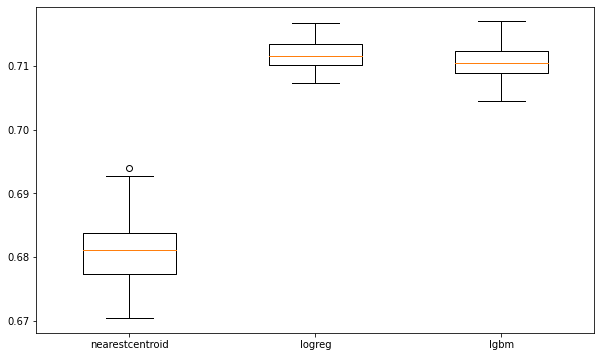

In [435]:
algoritmos = ['nearestcentroid','logreg','lgbm']
resultados = [scores1,scores2,scores3]

# Plot
plt.figure(figsize=(10,6))
box_data = resultados
plt.boxplot(box_data, widths = 0.5)
plt.xticks([1,2,3], algoritmos, rotation='horizontal')
# ax7.boxplot(box_data)
plt.show()

## 9.2 Teste de Normalidade: Shapiro Wilk

In [316]:
from scipy.stats import shapiro

resultados = [resultados_nearestcentroid, resultados_logreg, resultados_lgbm]
normalidade = []

for algoritmo in resultados:
    _, p = shapiro(algoritmo)
    p
    alpha = 0.05
    if p > alpha:
      print('Distribuição normal, p_value = {}'.format(p))
    else:
      print('Distribuição não normal, p_value = {}'.format(p))

Distribuição normal, p_value = 0.7354061603546143
Distribuição normal, p_value = 0.8901785016059875
Distribuição normal, p_value = 0.5418612957000732


## 9.3 Distribuição Normal: Testes paramétricos: Anova

Analise de variância para verificar se há diferença estatistica significante entre a média da acurácia balanceada dos modelos:

H0 - Hipotese Nula: Não há diferença estatística entre os algorítmos

In [317]:
from scipy.stats import f_oneway
_, p = f_oneway(resultados_nearestcentroid, resultados_logreg, resultados_lgbm)

alpha = 0.05
if p <= alpha:
    print('p-value = %s - Hipótese nula rejeitada.' %(p))
    print('Os resultados possuem diferença estatística significante com nivel de confiança de %s' %(1-alpha))
else:
    print('p-value = %s - Hipótese nula não pode ser rejeitada.' %(p))
    print('Os resultados não apresentam diferença estatística significante com nivel de confiança de %s' %(1-alpha) )

p-value = 2.640603373777943e-112 - Hipótese nula rejeitada.
Os resultados possuem diferença estatística significante com nivel de confiança de 0.95


## 9.4 Teste de Tukey

In [437]:
## Preparando os 30 resultados de cada algorítmo

lista_nearestcentroid = ['NearestCentroid' for i in range(len(resultados_nearestcentroid))]
lista_logreg = ['Regressao Logistica' for i in range(len(resultados_logreg))]
lista_lgbm = ['LGBM' for i in range(len(resultados_lgbm))]


lista_algoritmos = lista_nearestcentroid + lista_logreg + lista_lgbm

## Criando df com o nome dos algoritmos e os 30 resultados de cada
resultados_algoritmos = {'AUC': np.concatenate([resultados_nearestcentroid, resultados_logreg, resultados_lgbm]),
                         'algoritmo': lista_algoritmos}
resultados_algoritmos = pd.DataFrame(resultados_algoritmos)
#resultados_algoritmos

In [438]:
## Agrupando os resultados pela média
df_avaliacao = resultados_algoritmos.groupby('algoritmo').agg({'AUC':['mean','std']})
df_avaliacao

AUC          
                         mean       std
algoritmo                              
LGBM                 0.710607  0.002545
NearestCentroid      0.680940  0.005008
Regressao Logistica  0.711695  0.002095

In [321]:
# Realizando o teste de Tukey
from statsmodels.stats.multicomp import MultiComparison

compara_grupos = MultiComparison(resultados_algoritmos['metrica'], resultados_algoritmos['algoritmo'])
teste = compara_grupos.tukeyhsd()
print(teste)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1            group2       meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
           LGBM     NearestCentroid  -0.0297  0.001 -0.0312 -0.0282   True
           LGBM Regressao Logistica   0.0011 0.2003 -0.0004  0.0026  False
NearestCentroid Regressao Logistica   0.0308  0.001  0.0293  0.0322   True
--------------------------------------------------------------------------


## 9.5 Conclusão validação estatistica

Há diferença estatística entre NearestCentroid e os outros 2. Como o NearestCentroid foi o modelo que apresentou menor AUC podemos descartá-lo.

Não há diferença estatística na performance dos 2 algorítmos restantes LGBM e Regressão Logistica. Iremos escolher a Regressão logística pois apresentou maior AUC e menor desvio padrão.

- Modelo Final: Regressão Logística